### Problem Statement

The e-commerce industry has revolutionized the way people shop, with customers placing orders directly from websites rather than relying on physical stores. Companies like Amazon, Flipkart, and Myntra have set high standards in this space by offering personalized shopping experiences through advanced recommendation systems.

Ebuss, a growing e-commerce company, operates across various categories, including household essentials, books, personal care, medicines, beauty products, appliances, kitchenware, and healthcare products. To compete with established leaders and capture a larger market share, Ebuss seeks to enhance its recommendation system by integrating sentiment analysis into the process.

As a senior Machine Learning Engineer, your task is to develop and deploy a **Sentiment-Based Product Recommendation System** that analyzes customer reviews and ratings to provide personalized and accurate recommendations, ultimately improving customer satisfaction and engagement.

---

### Project Objectives:

1. **Sentiment Analysis**: Use customer reviews to identify sentiments and enhance the relevance of product recommendations.
2. **Recommendation System**: Develop and evaluate both **User-User** and **Item-Item Collaborative Filtering** models to determine the best approach.
3. **Integration**: Combine sentiment analysis and collaborative filtering to provide sentiment-driven recommendations.
4. **Deployment**: Build a user-friendly application to deploy the system on a cloud platform for live use.

---

### Detailed Steps:

#### **1. Data Exploration and Analysis**
   - Load and explore the dataset containing user reviews, ratings, and product details.
   - Perform exploratory data analysis (EDA) to understand the data distribution, identify trends, and detect missing or inconsistent data.

#### **2. Data Cleaning**
   - Handle missing values, duplicates, and irrelevant data points.
   - Standardize data formats (e.g., timestamps, product IDs).
   - Normalize text data to ensure consistency.

#### **3. Text Preprocessing**
   - Preprocess customer reviews to prepare them for sentiment analysis.
     - Steps include:
       - Lowercasing text.
       - Removing punctuation, stop words, and special characters.
       - Tokenization and lemmatization.

#### **4. Feature Extraction**
   - Convert preprocessed text into numerical features for model training:
     - Use techniques such as **TF-IDF**, **CountVectorizer**, or **Word Embeddings** (e.g., Word2Vec, GloVe).

#### **5. Sentiment Analysis Model**
   - Train a text classification model (e.g., Logistic Regression, Random Forest, or Neural Networks) to predict sentiment labels (e.g., positive, negative, neutral).
   - Evaluate the sentiment model on test data using metrics like accuracy, precision, recall, and F1-score.

#### **6. Recommendation System Development**
   - Build two collaborative filtering models:
     - **User-User Collaborative Filtering**: Recommend products based on similar users.
     - **Item-Item Collaborative Filtering**: Recommend products based on similar items.
   - Evaluate both models using metrics such as **Root Mean Squared Error (RMSE)** to identify the best-performing approach.

#### **7. Sentiment-Driven Recommendations**
   - Integrate the sentiment analysis model into the recommendation system to refine predictions:
     - Filter recommended products to prioritize those with positive sentiment scores.
     - Re-rank recommendations to reflect both collaborative filtering scores and sentiment analysis results.

#### **8. Model Evaluation**
   - Evaluate the overall performance of the sentiment-based recommendation system:
     - Compare predicted recommendations against actual user preferences.
     - Assess improvements in recommendation relevance due to sentiment integration.

#### **9. Flask Application Development**
   - Build a web-based application using Flask:
     - Implement REST API endpoints for fetching recommendations.
     - Create a simple and user-friendly interface for users to input preferences and view recommendations.

#### **10. Deployment on digitalocean**
   - Package the Flask application and deploy it on **digitalocean**:
     - Ensure the application is accessible via a public URL.
     - Use digitalocean's environment configuration to manage dependencies and model files.

---

### Deliverables:
1. **Trained Models**: Sentiment analysis and recommendation system models.
2. **Pickle Files**: Serialized models and preprocessing components for deployment.
3. **Flask Application**: A Python-based web app providing recommendation services.
4. **Deployed System**: A live application hosted on digitalocean with a user interface.

---

### Outcome:
A fully functional sentiment-based product recommendation system that delivers personalized, accurate, and sentiment-driven recommendations, enhancing the shopping experience for Ebuss customers and improving the company's competitive position in the e-commerce market.

In [2]:
# Importing the required library to mount Google Drive in Colab
from google.colab import drive

# Mounting Google Drive to the Colab environment so you can access files from your drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mydrive_path='drive/MyDrive/Capstone Project/'

In [6]:
# Importing necessary libraries for data manipulation and analysis
import numpy as np  # Numerical computing library
import pandas as pd  # Data analysis and manipulation library
import re, nltk, spacy, string  # Libraries for text processing and natural language processing
import en_core_web_sm  # Small English model for spaCy (used for NLP tasks like tokenization, POS tagging, etc.)

# Loading the small English language model from spaCy
nlp = en_core_web_sm.load()

# Importing data visualization libraries
import seaborn as sns  # For creating statistical graphics
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
# Ensures that plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Importing plotly for interactive plotting
from plotly.offline import plot  # Plotting in offline mode
import plotly.graph_objects as go  # For creating complex, interactive plots
import plotly.express as px  # For simpler and easier-to-use plots

# Importing libraries for text vectorization and machine learning metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer  # For converting text to numerical form
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, f1_score, precision_score, accuracy_score  # Evaluation metrics
from sklearn.metrics import pairwise_distances  # For computing distances between feature vectors
from sklearn.linear_model import LogisticRegression  # Logistic Regression classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Ensemble methods for classification
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # For splitting data and hyperparameter tuning
from sklearn.preprocessing import MinMaxScaler  # For feature scaling (normalization)
import xgboost as xgb  # XGBoost library for gradient boosting, widely used in classification tasks

In [5]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.3 MB/s eta 0:00:00


In [7]:
# Setting the maximum column width for pandas DataFrames to 500 characters.
# This ensures that when displaying DataFrames, the contents of each column
# will not be truncated, even if they are very long. It helps in visualizing
# full text data in DataFrames during analysis.
pd.set_option('max_colwidth', 500)


In [8]:
# Reading the CSV file from the specified path ('mydrive_path') and loading it into a DataFrame.
# The file 'sample30.csv' is read using pandas' read_csv function.
master_df = pd.read_csv(mydrive_path + 'sample30.csv')

# Creating a copy of the original DataFrame to work with (avoiding modifying the original dataset directly).
df = master_df.copy()

# Displaying a random sample of 5 rows from the DataFrame to inspect a small subset of the data.
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
22656,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy,"Personal Care,Hair Care,Shampoo,Featured Brands,Health & Beauty,Unilever,Beauty,Shampoo & Conditioner,Shampoos,Hair Care & Styling,Shampoos & Conditioners,Ways To Shop",Clear,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,2017-01-25T17:01:48.000Z,NaN,True,5,I have very long hair and this product leaves my hair fresh and silky.l just love it.,Long Thick And Silky.,NaN,NaN,it works,Positive
13477,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-03-22T00:00:00.000Z,False,True,5,"It is hard to get kids to want to clean anything, but these wipes do the job well.. They are convenient and easy for anyone, and our kids love using them!! This review was collected as part of a promotion.",Kid Approved,NaN,NaN,ketchums,Positive
1175,AV1Ymf_rglJLPUi8II2v,Disney,"Movies, Music & Books,Movies,Kids' & Family,Movies & TV Shows,Disney,Movies & TV,Movies & Music,VHS Custom Stores,Animated Movies,Kids & Family,All Disney Titles,Animation",Disney/Pixar,Cars Toon: Mater's Tall Tales,2014-01-06T00:00:00.000Z,True,True,5,Great movie,Great Movie,NaN,NaN,happycustomer121212,Positive
13164,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-01-22T00:00:00.000Z,False,True,5,"Great product, they are so easy to use. I keep a can in every bathroom. I live with a 3 males...it would be gross if I didn't have my clorox wipes to clean up after them! This review was collected as part of a promotion.",Great product,NaN,NaN,angee39,Positive
28738,AVpfUJu_ilAPnD_xZdDr,Chobani,"Food & Beverage,Fresh Food,Dairy,Yogurt,Food & Beverage Ways To Shop,Special Diets,Featured Brands,Grocery,Yogurt Snacks,Food,Dairy, Eggs & Cheese,Yogurt & Yogurt Drinks,Greek Yogurt,Computers Features,Greek & Strained Flavored Yogurt",Chooka,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,2016-01-20T00:00:00.000Z,False,True,5,Love the taste....creamy texture....smooth,Yogurt,NaN,NaN,alice,Positive


In [9]:
### Total reviews
# Calculate the total number of reviews by getting the length of the 'reviews_text' column.
# This assumes that each entry in the 'reviews_text' column represents one review.
total = len(df['reviews_text'])
print("Number of reviews: ", total)

### How many unique reviewers?
# Get the number of unique reviewers by counting the unique values in the 'reviews_username' column.
# This tells us how many distinct users have left reviews.
print("Number of unique reviewers: ", len(df['reviews_username'].unique()))

# Calculate the proportion of unique reviewers to the total number of reviews.
# This gives an idea of how many reviews come from repeat versus one-time reviewers.
reviewer_prop = float(len(df['reviews_username'].unique()) / total)
print("Proportion of unique reviewers: ", round(reviewer_prop, 3))

### Average star score
# Calculate the average rating score by taking the mean of the 'reviews_rating' column.
# This gives us an overall idea of how reviewers rated the products (or services).
print("Average rating score: ", round(df['reviews_rating'].mean(), 3))

Number of reviews:  30000
Number of unique reviewers:  24915
Proportion of unique reviewers:  0.831
Average rating score:  4.483


In [10]:
# Data Overview
# Getting the number of rows in the DataFrame (i.e., how many records or entries are present).
print('Rows: ', df.shape[0])

# Getting the number of columns in the DataFrame (i.e., how many features or attributes are available).
print('Columns: ', df.shape[1])

# Displaying the list of feature names (i.e., column names) in the DataFrame.
# This helps you understand the structure of the data.
print('\nFeatures: ', df.columns.to_list())

# Checking for missing values in the dataset.
# The function 'isnull()' returns a DataFrame of the same shape with True for missing values and False otherwise.
# 'values.sum()' gives the total number of missing values in the entire dataset.
print('\nMissing values: ', df.isnull().values.sum())

# Getting the number of unique values for each column in the DataFrame.
# This can give you an idea of the diversity of data in each column.
print('\nUnique values: \n', df.nunique())

Rows:  30000
Columns:  15

Features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

Missing values:  74980

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18535
reviews_userCity          977
reviews_userProvince       42
reviews_username        24914
user_sentiment              2
dtype: int64


### Explanation:
- **Rows (`df.shape[0]`)**: `df.shape[0]` returns the number of rows in the DataFrame, which represents the total number of records.
- **Columns (`df.shape[1]`)**: `df.shape[1]` gives the number of columns, representing how many features or attributes exist in the dataset.
- **Feature Names (`df.columns.to_list()`)**: `df.columns.to_list()` provides the names of all columns in the DataFrame. This is helpful for understanding the structure of the dataset.
- **Missing Values (`df.isnull().values.sum()`)**: The `.isnull()` method checks for missing data in each column, and `.values.sum()` counts the total number of missing values across the entire dataset.
- **Unique Values (`df.nunique()`)**: `df.nunique()` returns the number of unique values in each column, giving you an understanding of the variability of each feature (e.g., how many unique categories are there in a categorical column).

In [11]:
# Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

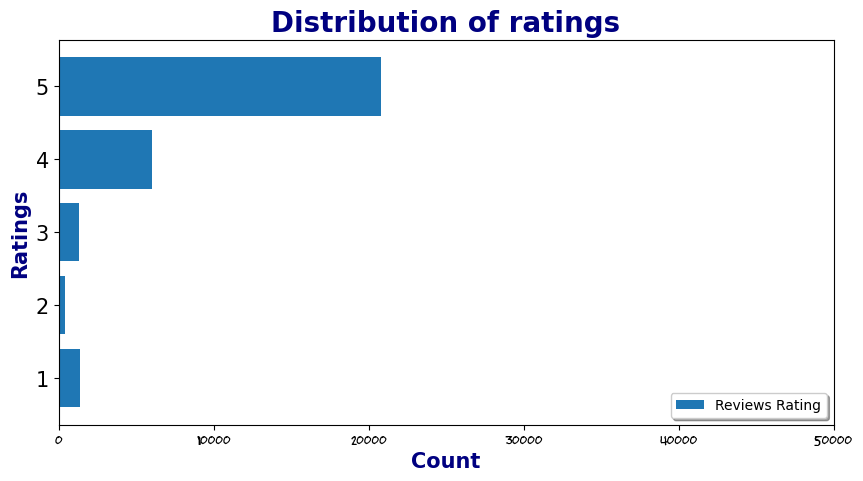

In [12]:
# Number of occurrences for each rating
# Plotting the frequency distribution of ratings

# Setting the size of the figure (width, height) to make the plot more readable.
plt.figure(figsize=[10,5])

# Getting the unique rating values and their respective counts using value_counts().
# 'x' will hold the unique rating values, and 'y' will hold the corresponding frequencies (counts).
x = list(df['reviews_rating'].value_counts().index)
y = list(df['reviews_rating'].value_counts())

# Creating a horizontal bar plot with ratings on the y-axis and their counts on the x-axis.
plt.barh(x, y)

# Setting the ticks for the x-axis (counts) to appear at evenly spaced intervals.
# np.linspace(start, end, num) generates `num` evenly spaced numbers between `start` and `end`.
ticks_x = np.linspace(0, 50000, 6)  # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')  # Customizing x-tick labels with font size and color

# Customizing the y-tick labels' font size to 15 for better readability.
plt.yticks(size=15)

# Adding a title to the plot, with customized font size, weight, color, and alignment (center).
plt.title('Distribution of ratings', fontsize=20, weight='bold', color='navy', loc='center')

# Labeling the x-axis ('Count') and y-axis ('Ratings') with bold fonts and navy color for better visibility.
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')

# Adding a legend to the plot, with shadow effect and specifying the location.
plt.legend(['Reviews Rating'], shadow=True, loc=4)

### Explanation:
1. **`plt.figure(figsize=[10,5])`**: Specifies the dimensions of the plot (width 10, height 5), making it wide enough to accommodate all the bars clearly.
2. **`df['reviews_rating'].value_counts()`**: This function is used to count the occurrences of each unique rating in the `reviews_rating` column. It returns the values in descending order by default.
   - `x` contains the unique rating values.
   - `y` contains the frequency of each rating.
3. **`plt.barh(x, y)`**: This creates a horizontal bar plot where `x` represents the ratings and `y` represents the frequency (or count) of each rating.
4. **`np.linspace(0, 50000, 6)`**: This generates evenly spaced values along the x-axis (count values), from 0 to 50,000, with 6 ticks.
5. **`plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')`**: Customizes the x-axis tick labels with specific font settings (size, family, and color).
6. **`plt.yticks(size=15)`**: Adjusts the font size of the y-axis labels.
7. **`plt.title`, `plt.xlabel`, and `plt.ylabel`**: Adds a title and labels to the axes with customized fonts, sizes, and colors to make the plot more readable and visually appealing.
8. **`plt.legend()`**: Adds a legend to describe the data shown in the plot.

### Outcome:
This plot visualizes the distribution of ratings (how many times each rating occurs) with clear, readable axis labels, a title, and a legend. It helps you understand the frequency of each rating in the dataset.

<ipython-input-13-c546298605e3>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





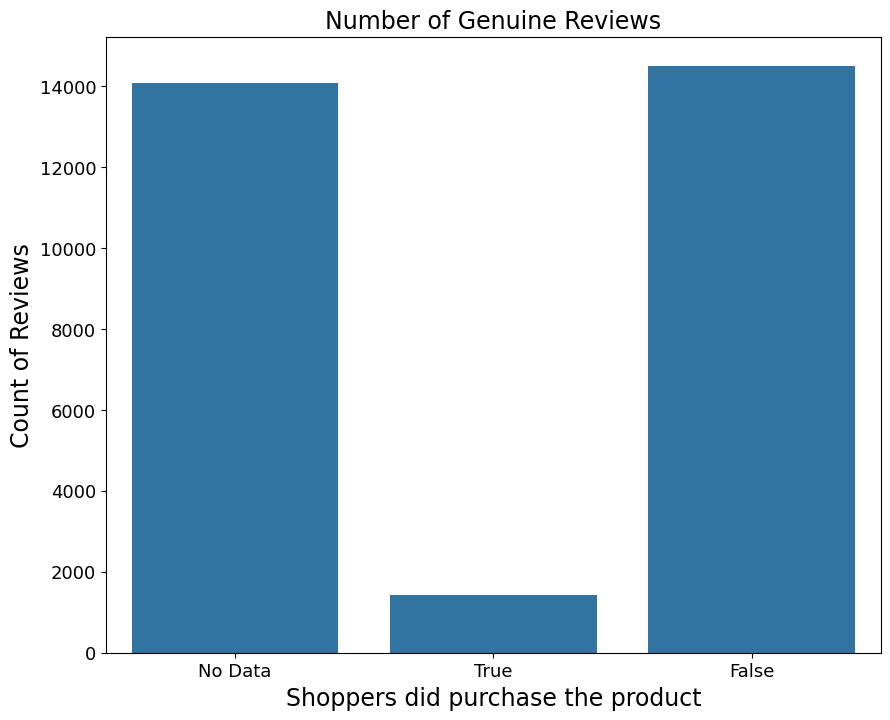

In [13]:
# Number of Positive and Negative reviews in the dataset, showing class imbalance.
# Replacing NaN (missing) values in the 'reviews_didPurchase' column with 'No Data'
# This is done because some reviewers may not have provided information on whether they purchased the product.
df['reviews_didPurchase'].fillna('No Data', inplace=True)

# Plotting the distribution of reviews for customers who have purchased the product.
# This helps to visualize the class imbalance between those who purchased the product and those who didn't.
plt.figure(figsize=(10,8))  # Setting the figure size for better visibility

# Using seaborn's countplot to create a bar plot of the distribution of the 'reviews_didPurchase' column.
# This column indicates whether a reviewer purchased the product ('Yes', 'No', 'No Data').
ax = sns.countplot(x=df['reviews_didPurchase'])

# Setting the x-axis label to specify the feature being visualized.
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)

# Setting the y-axis label to specify the count of reviews for each category (purchased or not).
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)

# Adding a title to the plot for clarity.
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)

# Customizing the tick labels' font size for better readability.
ax.tick_params(labelsize=13)

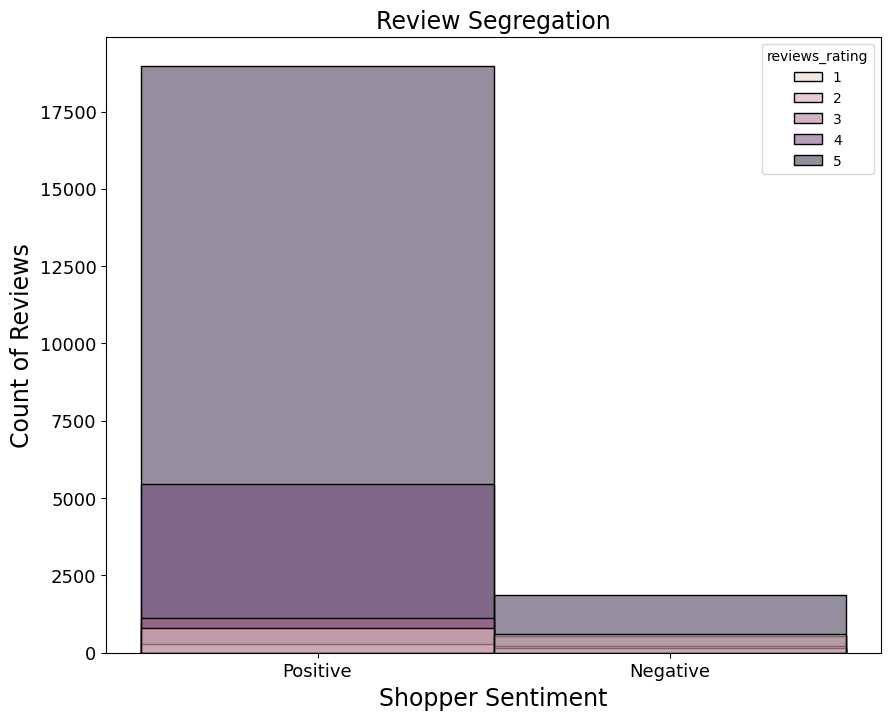

In [14]:
# To check whether any corrections are needed in the DataFrame based on the relationship between 'reviews_rating' and 'user_sentiment'.
# Uncomment the following line to set the figure size (optional, in case you're using Jupyter/IPython notebooks).
# from IPython.core.pylabtools import figsize
# figsize(10,10)

# The commented code below is an alternative approach for visualizing the distribution of 'user_sentiment'
# for different rating values using a histogram. The hue parameter is used to color the histogram bars
# based on the 'reviews_rating' column (indicating the rating of the review).

# sns.histplot(hue=df['reviews_rating'], x=df['user_sentiment'])
# plt.yticks(np.arange(0,30000,10000))  # Setting custom y-axis ticks for better readability
# plt.show()  # Display the plot

# Now we are using the active plot with adjusted size and axes settings:
plt.figure(figsize=(10,8))  # Setting the size of the figure to make it larger and more readable

# Creating the histogram plot of 'user_sentiment', with colors based on the 'reviews_rating' (hue).
# The 'hue' argument distinguishes the different 'reviews_rating' categories in the histogram.
ax = sns.histplot(hue=df['reviews_rating'], x=df['user_sentiment'])

# Customizing the x-axis label to indicate it's showing shopper sentiment.
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=17)

# Customizing the y-axis label to show the count of reviews in each sentiment category.
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)

# Adding a title to the plot to explain its purpose (segregation of reviews based on sentiment and rating).
ax.axes.set_title('Review Segregation', fontsize=17)

# Adjusting the tick parameters for readability (adjusting font size of tick labels).
ax.tick_params(labelsize=13)

In [15]:
# Counting the occurrences of each unique value in the 'user_sentiment' column
print(df['user_sentiment'].value_counts())

user_sentiment
Positive    26632
Negative     3367
Name: count, dtype: int64


### Explanation:
- **`df['user_sentiment']`**: This refers to the `user_sentiment` column of the DataFrame.
- **`.value_counts()`**: This function counts the number of occurrences of each unique value in the specified column. It returns a pandas Series where the index is the unique values and the values are the counts.

### Expected Output:
The output will be a count of each sentiment in the `user_sentiment` column, for example:

```
user_sentiment
Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64
```

This will help you understand how many positive, negative, and neutral sentiments are present in the `user_sentiment` column.

If you see unexpected counts (like an unusually high number of `NaN` or inconsistent sentiment labels), you may want to clean or correct the data.


In [16]:
# To download the stopwords from the NLTK library
import nltk
nltk.download('stopwords')

# import nltk:
# This imports the Natural Language Toolkit (NLTK) library, which is widely used for text processing tasks like tokenization, stemming, and stopword removal.

# nltk.download('stopwords'):
# This command downloads the "stopwords" dataset from the NLTK library. "Stopwords" are commonly used words (like "the", "is", "in", "and") that are often removed during text processing because they don't carry much meaningful information for analysis. The stopwords corpus includes a list of stopwords for several languages


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


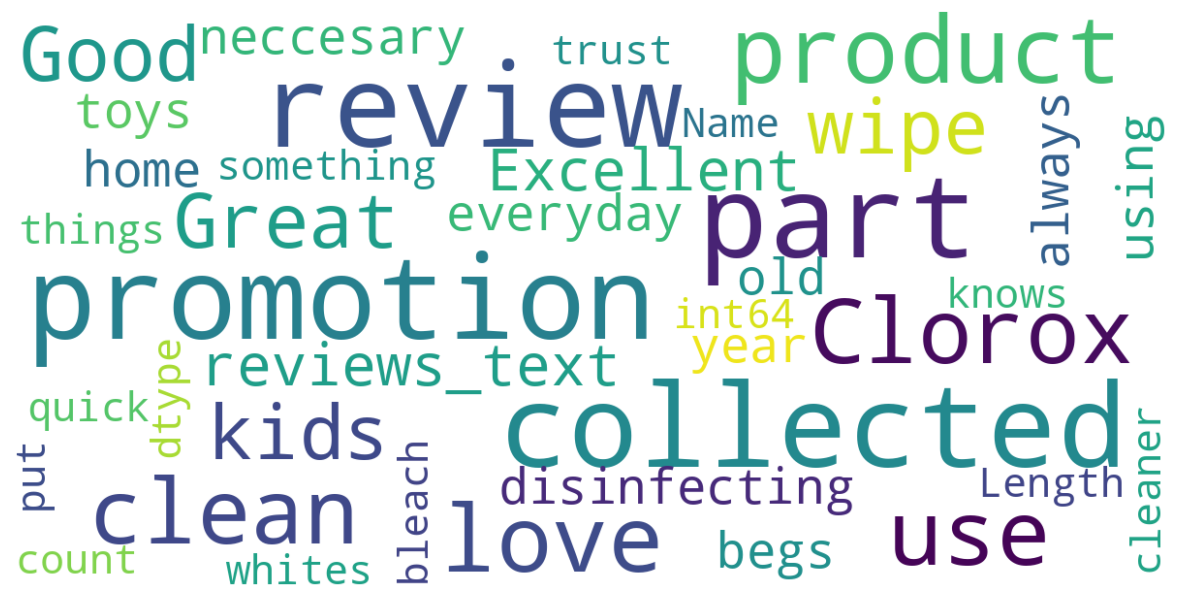

In [18]:
# Import necessary libraries
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Prepare the stopwords set (from WordCloud STOPWORDS) to exclude common words in the word cloud
stopwords = set(STOPWORDS)

# Generate a WordCloud object:
# - 'background_color' sets the background color to white
# - 'stopwords' filters out common words (e.g., "the", "and", "is")
# - 'max_words' limits the number of words to display in the word cloud (max 300 words)
# - 'max_font_size' controls the largest font size in the word cloud
# - 'scale' controls the scaling factor (higher scale results in more detailed image)
# - 'random_state' ensures reproducibility of the random elements in the word cloud
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df['reviews_text'].value_counts()))

# Display the word cloud
plt.figure(figsize=(15,15))  # Increase the figure size for better clarity
plt.imshow(wordcloud, interpolation='bilinear')  # 'bilinear' interpolation smoothens the image
plt.axis('off')  # Turn off the axis lines and labels
plt.show()  # Display the word cloud

In [19]:
# Finding the number of rows with Null values
df.isnull().sum()

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,0
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [20]:
df.shape

(30000, 15)

In [21]:
# Dropping the columns 'reviews_userCity' and 'reviews_userProvince' from the DataFrame df
df = df.drop(columns=['reviews_userCity', 'reviews_userProvince'], axis=1)

# Displaying the first few rows of the DataFrame after dropping the specified columns
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


### Explanation:
1. **`df.drop(columns=['reviews_userCity', 'reviews_userProvince'], axis=1)`**:
   - **`df.drop()`**: The `drop()` method is used to remove specified labels (in this case, columns) from the DataFrame.
   - **`columns=['reviews_userCity', 'reviews_userProvince']`**: Specifies the columns to be dropped — `reviews_userCity` and `reviews_userProvince` in this case.
   - **`axis=1`**: This specifies that we are dropping columns. If you set `axis=0`, it would drop rows instead of columns.
   
2. **`df.head()`**:
   - **`df.head()`**: Displays the first 5 rows of the DataFrame by default. This allows you to quickly check the result of the column removal and verify the current state of the DataFrame.

### Why Drop These Columns?
- **Reducing Redundancy**: If the columns `reviews_userCity` and `reviews_userProvince` are deemed unnecessary for your analysis, you can drop them to reduce the dimensionality of your dataset.
- **Handling Missing Data**: If these columns have a lot of missing data or if they don't provide valuable information for your analysis, dropping them can improve the quality and efficiency of your model or analysis.
  
### Example Output:

If the DataFrame had the following columns before dropping:

| reviews_username | reviews_rating | reviews_text | reviews_userCity | reviews_userProvince |
|------------------|----------------|--------------|-------------------|----------------------|
| user1            | 5              | Excellent    | New York          | NY                   |
| user2            | 3              | Okay         | Los Angeles       | CA                   |
| user3            | 4              | Good         | Chicago           | IL                   |

After running the code, the DataFrame will look like:

| reviews_username | reviews_rating | reviews_text |
|------------------|----------------|--------------|
| user1            | 5              | Excellent    |
| user2            | 3              | Okay         |
| user3            | 4              | Good         |

In [22]:
# Print the shape of the DataFrame (number of rows and columns)
print("shape of the dataframe =", df.shape)

# Calculate the percentage of missing (NaN) values in each column
missing_percentage = df.isnull().sum() / len(df)
print(missing_percentage)

shape of the dataframe = (30000, 13)
id                     0.000000
brand                  0.000000
categories             0.000000
manufacturer           0.004700
name                   0.000000
reviews_date           0.001533
reviews_didPurchase    0.000000
reviews_doRecommend    0.085667
reviews_rating         0.000000
reviews_text           0.000000
reviews_title          0.006333
reviews_username       0.002100
user_sentiment         0.000033
dtype: float64


In [23]:
df['user_sentiment'].value_counts()

,count
user_sentiment,
Positive,26632
Negative,3367


In [24]:
def review_sentiment_clear(x):
    if x >= 3:
        return 'Positive'  # If rating is 3 or greater, return 'Positive'
    elif x > 0 and x < 3:
        return 'Negative'  # If rating is greater than 0 but less than 3, return 'Negative'
    else:
        return 'Neutral'  # Optional: Handle zero ratings (if relevant)


### Key Points:
1. **Sentiment Classification**:  
   You are classifying the sentiment based on a rating, where:
   - If the rating is **greater than or equal to 3**, it is classified as **Positive**.
   - If the rating is **greater than 0 but less than 3**, it is classified as **Negative**.
   
   However, the function doesn't return anything for the case where the rating is exactly **0** (though it seems like ratings should generally start from 1 based on the typical scale).

2. **Return Value for 'Neutral' Case**:  
   You might want to handle the case for exactly **0** or **Neutral** ratings if those exist in the data, or you might simply need to update the logic to consider the entire possible rating range.

### Explanation of Changes:
- **`x >= 3`**: If the rating is 3 or higher, the sentiment is classified as **Positive**.
- **`x > 0 and x < 3`**: If the rating is between 0 and 3 (excluding 0), the sentiment is classified as **Negative**.
- **`else`**: If the rating is exactly 0 or another undefined case, you can classify it as **Neutral** (you can remove this if 0 ratings aren't a part of your dataset).

### How to Apply This Function:
If you want to apply this function to the `reviews_rating` column of the DataFrame, you can use the `apply()` method:

```python
df['review_sentiment'] = df['reviews_rating'].apply(review_sentiment_clear)
```

This will create a new column `review_sentiment` in your DataFrame, classifying each review as "Positive", "Negative", or "Neutral" based on the `reviews_rating`.

### Example:

If your DataFrame looks like this:

| reviews_rating | reviews_text      |
|----------------|-------------------|
| 5              | Great product!    |
| 2              | Not worth it.     |
| 3              | It's okay.        |
| 0              | Haven't used yet. |

After applying the `review_sentiment_clear()` function, it would look like this:

| reviews_rating | reviews_text      | review_sentiment |
|----------------|-------------------|------------------|
| 5              | Great product!    | Positive         |
| 2              | Not worth it.     | Negative         |
| 3              | It's okay.        | Positive         |
| 0              | Haven't used yet. | Neutral          |

In [25]:
# Apply the 'review_sentiment_clear' function to the 'reviews_rating' column
# This function will classify each review rating into 'Positive', 'Negative', or 'Neutral'
df['user_sentiment'] = df['reviews_rating'].apply(review_sentiment_clear)

# Display the first few rows of the DataFrame to verify the newly added 'user_sentiment' column
# This will allow us to check if the sentiment classification has been applied correctly
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,No Data,NaN,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [26]:
# Count the occurrences of each unique sentiment value in the 'user_sentiment' column
# This will give a breakdown of how many reviews are classified as 'Positive', 'Negative', and 'Neutral'
df['user_sentiment'].value_counts()


,count
user_sentiment,
Positive,28196
Negative,1804


# 3. Preprocessing

In [27]:
# Importing necessary libraries for text cleaning and natural language processing
import nltk
from nltk.stem import LancasterStemmer  # For stemming words
from nltk.stem import WordNetLemmatizer  # For lemmatizing words
nltk.download('punkt')  # For tokenizing text into words and sentences
nltk.download('stopwords')  # For removing common stopwords
nltk.download('wordnet')  # For lemmatization
nltk.download('omw-1.4')  # For additional resources for lemmatization
from nltk.corpus import stopwords  # Stopwords corpus from NLTK
import unicodedata  # For working with Unicode characters
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize  # For tokenization
import re  # For regular expression operations
import html  # For handling HTML entities in text


# Function to remove special characters from text
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zAz\s]'
    text = re.sub(pattern, '', text)  # Apply regex pattern to remove characters
    return text


# Function to convert a list of words to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()  # Convert word to lowercase
        new_words.append(new_word)
    return new_words


# Function to remove punctuation and special characters from a list of words
def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)  # Remove punctuation
        if new_word != '':  # If the word is not empty after cleaning
            new_word = remove_special_characters(new_word, True)  # Remove any other special characters
            new_words.append(new_word)
    return new_words


# Load stopwords in English
stopword_list = stopwords.words('english')

# Function to remove stopwords from a list of tokenized words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:  # If the word is not in the stopwords list
            new_words.append(word)
    return new_words


# Function to perform stemming using Lancaster Stemmer
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()  # Initialize Lancaster stemmer
    stems = []
    for word in words:
        stem = stemmer.stem(word)  # Apply stemming to word
        stems.append(stem)
    return stems


# Function to lemmatize verbs using WordNet Lemmatizer
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()  # Initialize WordNet lemmatizer
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')  # Lemmatize as a verb
        lemmas.append(lemma)
    return lemmas


# Function to normalize text by applying several cleaning steps
def normalize(words):
    words = to_lowercase(words)  # Convert words to lowercase
    words = remove_punctuation_and_splchars(words)  # Remove punctuation and special characters
    words = remove_stopwords(words)  # Remove stopwords
    return words


# Function to lemmatize a list of words
def lemmatize(words):
    lemmas = lemmatize_verbs(words)  # Lemmatize the verbs in the list
    return lemmas


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [28]:
# Function to clean and lemmatize the input text
def normalize_and_lemmaize(input_text):
    # Remove special characters from the input text
    input_text = remove_special_characters(input_text)

    # Tokenize the input text into individual words
    words = nltk.word_tokenize(input_text)

    # Normalize the words (convert to lowercase, remove punctuation, and stopwords)
    words = normalize(words)

    # Lemmatize the normalized words (convert to base form)
    lemmas = lemmatize(words)

    # Join the lemmatized words back into a single string and return it
    return ' '.join(lemmas)

In [29]:
# Creating a new DataFrame with only the 'reviews_text' and 'user_sentiment' columns
# This DataFrame contains the reviews and their corresponding sentiment labels (Positive, Negative, Neutral)
review_df = df[['reviews_text', 'user_sentiment']]

# Displaying the first few rows of the new DataFrame to check its content
review_df.head()


,reviews_text,user_sentiment
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,Good flavor. This review was collected as part of a promotion.,Positive
2,Good flavor.,Positive
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


In [30]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [31]:
# Creating a new column 'lemmatized_text' by applying the 'normalize_and_lemmaize' function to the 'reviews_text' column
# This will clean the reviews text by removing special characters, normalizing, and lemmatizing the words
review_df['lemmatized_text'] = review_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))

# Displaying the first few rows of the DataFrame to check the newly added 'lemmatized_text' column
review_df.head()

<ipython-input-31-0c60ffb88349>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,love album good hip hop side current pop sound listen everyday gym give star rat way metaphors crazy
1,Good flavor. This review was collected as part of a promotion.,Positive,ood flavor review collect part promotion
2,Good flavor.,Positive,ood flavor
3,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did notice, however, was the messy consistency that was reminiscent of a more liquid-y vaseline. It was difficult to clean up, and was not a pleasant, especially since it lacked the 'captivating' sensatio...",Negative,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation hat notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect disappoint pay much lube wont use could use normal personal lubricant less money less mess
4,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel


In [32]:
# Creating a new DataFrame 'review_new_df' containing only the 'lemmatized_text' and 'user_sentiment' columns
# This will result in a DataFrame with lemmatized review text and its associated sentiment label (Positive, Negative, Neutral)
review_new_df = review_df[['lemmatized_text', 'user_sentiment']]

# Displaying the newly created DataFrame to view its contents
review_new_df


,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound listen everyday gym give star rat way metaphors crazy,Positive
1,ood flavor review collect part promotion,Positive
2,ood flavor,Positive
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation hat notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect disappoint pay much lube wont use could use normal personal lubricant less money less mess,Negative
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,Negative
...,...,...
29995,get conditioner nfluenster try im love far oily hair use end hair feel amaze soft mess review collect part promotion,Positive
29996,love receive review purpose influenster leave hair feel fresh smell great,Positive
29997,irst love smell product wash hair smooth easy brush receive product influenster test purpose opinions review collect part promotion,Positive
29998,receive nfluenster never go back anything else normally dont use conditioner hair oily fine make hair feel heavy doesnt get oily day really fantastic plan buy future review collect part promotion,Positive


In [33]:
# Mapping the 'user_sentiment' column to numeric values
# 'Negative' is mapped to 0, and 'Positive' is mapped to 1
# This step is typically performed to prepare the sentiment labels for machine learning models
review_new_df['user_sentiment'] = review_new_df['user_sentiment'].map({'Negative': 0, 'Positive': 1})

# Displaying the first few rows of the DataFrame to check the updated 'user_sentiment' column with numeric labels
review_new_df.head()

<ipython-input-33-808171f4bdad>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound listen everyday gym give star rat way metaphors crazy,1
1,ood flavor review collect part promotion,1
2,ood flavor,1
3,read review look buy one couple lubricants ultimately disappoint didnt even live review read starters neither boyfriend could notice sort enhance captivate sensation hat notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captivate sensation expect disappoint pay much lube wont use could use normal personal lubricant less money less mess,0
4,husband buy gel us gel cause irritation felt like burn skin wouldnt recommend gel,0


In [34]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.2 MB/s eta 0:00:00


In [35]:
# Importing the 'Counter' class from the collections module
# This is useful for counting the occurrences of elements, such as sentiment labels or class distribution
from collections import Counter

# Importing the 'SMOTE' (Synthetic Minority Over-sampling Technique) from imbalanced-learn library
# SMOTE is used for oversampling the minority class in imbalanced datasets by generating synthetic examples
from imblearn.over_sampling import SMOTE

In [36]:
# Splitting the data into training and testing sets (75% for training and 25% for testing)
# The 'stratify' parameter ensures that the distribution of the 'user_sentiment' column is preserved across both train and test sets
# This is important for class-imbalanced datasets to ensure the sentiment distribution is similar in both sets
x_train, x_test, y_train, y_test = train_test_split(
    review_new_df['lemmatized_text'],  # Features (lemmatized review text)
    review_new_df['user_sentiment'],   # Target variable (user sentiment labels)
    train_size=0.75,                   # 75% of the data will be used for training
    random_state=45,                   # Ensuring reproducibility of the split
    stratify=review_new_df['user_sentiment']  # Preserve the sentiment distribution in both sets
)

# Displaying the distribution of sentiment labels in the training set
# This helps to check the class distribution after the split
y_train.value_counts()

,count
user_sentiment,
1,21147
0,1353


In [37]:
# Importing TfidfTransformer from sklearn to transform the count-based features into TF-IDF features
# CountVectorizer is used to convert the raw text data into a matrix of token counts
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# Initialize the CountVectorizer to convert text data into a bag-of-words model (token count matrix)
count_vect = CountVectorizer()

# Apply the CountVectorizer to the training data (x_train) to create the word count matrix
x_count = count_vect.fit_transform(x_train)

# Initialize the TfidfTransformer to transform the count-based features into TF-IDF features
tfidf_transformer = TfidfTransformer()

# Fit and transform the word count matrix into TF-IDF features
x_train_transformed = tfidf_transformer.fit_transform(x_count)

# Displaying the shape of the transformed feature matrix (rows = number of samples, columns = number of unique tokens)
x_train_transformed.shape

(22500, 16006)

In [39]:
import pickle
# Save the CountVectorizer to a pickle file
with open(mydrive_path + 'pickle_file/count_vector.pkl', 'wb') as f:
    pickle.dump(count_vect, f)

# Save the TfidfTransformer to a pickle file
with open(mydrive_path + 'pickle_file/tfidf_transformer.pkl', 'wb') as f:
    pickle.dump(tfidf_transformer, f)

print("CountVectorizer and TfidfTransformer have been saved to separate pickle files.")

CountVectorizer and TfidfTransformer have been saved to separate pickle files.


In [40]:
# Importing the pickle module to save the CountVectorizer and TF-IDF transformer objects for later use
import pickle

# Saving the CountVectorizer object to a pickle file to preserve the vectorization method
# This allows us to reuse the vectorizer later without having to retrain it
pickle.dump(count_vect, open(mydrive_path + 'pickle_file/count_vector.pkl', 'wb'))

# Saving the TF-IDF transformer object to a pickle file
# This allows us to apply the same TF-IDF transformation on new data in the future
pickle.dump(tfidf_transformer, open(mydrive_path + 'pickle_file/tfidf_transformer.pkl', 'wb'))

In [41]:
# Importing the Counter class from the collections module to count the occurrences of sentiment labels
from collections import Counter

# Checking the distribution of the sentiment labels in the training set before any resampling
# This will show the count of each class (e.g., Negative and Positive)
count = Counter(y_train)
print('Before sampling:', count)

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes in the training set
# SMOTE generates synthetic samples for the minority class to ensure a balanced dataset
sampler = SMOTE()

# Resampling the training data (x_train_transformed) and the corresponding sentiment labels (y_train)
# This will create a balanced dataset by oversampling the minority class
x_train_sm, y_train_sm = sampler.fit_resample(x_train_transformed, y_train)

# Checking the distribution of sentiment labels after resampling to confirm balance
count = Counter(y_train_sm)
print('After sampling:', count)

Before sampling: Counter({1: 21147, 0: 1353})
After sampling: Counter({1: 21147, 0: 21147})


In [42]:
# Function to calculate and print model performance metrics, including accuracy, ROC AUC score, confusion matrix, precision, F1 score, sensitivity, and specificity
# This function takes true labels (y), predicted labels (y_pred), model name, and a list of metrics as inputs

performance = []  # List to store the performance metrics of multiple models

def model_metrics(y, y_pred, model_name, metrics):
    # Calculate various performance metrics
    Accuracy = accuracy_score(y, y_pred)  # Accuracy of the model
    roc = roc_auc_score(y, y_pred)  # ROC AUC score
    confusion = confusion_matrix(y, y_pred)  # Confusion matrix
    precision = precision_score(y, y_pred)  # Precision score
    f1 = f1_score(y, y_pred)  # F1 score

    # Extracting values from the confusion matrix
    TP = confusion[1, 1]  # True positive
    TN = confusion[0, 0]  # True negative
    FP = confusion[0, 1]  # False positive
    FN = confusion[1, 0]  # False negative

    # Calculate sensitivity (recall) and specificity
    sensitivity = TP / float(TP + FN)  # Sensitivity (True Positive Rate)
    specificity = TN / float(TN + FP)  # Specificity (True Negative Rate)

    # Printing the model performance metrics
    print("*" * 50)
    print('Confusion Matrix =')
    print(confusion)
    print("Sensitivity of the %s = %f" % (model_name, round(sensitivity, 2)))
    print("Specificity of the %s = %f" % (model_name, round(specificity, 2)))
    print("Accuracy Score of %s = %f" % (model_name, Accuracy))
    print('ROC AUC score of %s = %f' % (model_name, roc))
    print("Classification Report =")
    print(classification_report(y, y_pred))  # Detailed classification report
    print("*" * 50)

    # Append the calculated metrics for the current model to the metrics list
    metrics.append(dict({
        'Model_name': model_name,
        'Accuracy': Accuracy,
        'Roc_auc_score': roc,
        'Precision': precision,
        'F1_score': f1
    }))

    return metrics  # Return the updated metrics list


In [47]:
# Logistic Regression Model
# Initializing the LogisticRegression model and fitting it on the oversampled training data (x_train_sm and y_train_sm)

lr = LogisticRegression()  # Creating an instance of the Logistic Regression model
lr.fit(x_train_sm, y_train_sm)  # Fitting the model on the resampled training data

LogisticRegression()

In [48]:
# Making predictions using the trained Logistic Regression model on the resampled training data
y_pred = lr.predict(x_train_sm)

# Evaluating the performance of the Logistic Regression model using the 'model_metrics' function
# This function calculates various metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred, 'Logistic Regression', performance)

**************************************************
Confusion Matrix =
[[20719   428]
 [ 1164 19983]]
Sensitivity of the Logistic Regression = 0.940000
Specificity of the Logistic Regression = 0.980000
Accuracy Score of Logistic Regression = 0.962359
ROC AUC score of Logistic Regression = 0.962359
Classification Report =
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     21147
           1       0.98      0.94      0.96     21147

    accuracy                           0.96     42294
   macro avg       0.96      0.96      0.96     42294
weighted avg       0.96      0.96      0.96     42294

**************************************************


In [ ]:
# Random Forest Classifier Model
# Initializing the RandomForestClassifier and fitting it on the oversampled training data (x_train_sm and y_train_sm)

rf = RandomForestClassifier()  # Creating an instance of the Random Forest Classifier
rf.fit(x_train_sm, y_train_sm)  # Fitting the model on the resampled training data

RandomForestClassifier()

In [ ]:
# Making predictions using the trained Random Forest Classifier model on the resampled training data
y_pred_rf = rf.predict(x_train_sm)

# Evaluating the performance of the Random Forest Classifier model using the 'model_metrics' function
# This function calculates various metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred_rf, 'RandomForestClassifier', performance)

**************************************************
Confusion Matrix =
[[21138     9]
 [  133 21014]]
Sensitivity of the RandomForestClassifier = 0.990000
Specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.996643
ROC AUC score of RandomForestClassifier = 0.996643
Classification Report =
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21147
           1       1.00      0.99      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


In [ ]:
# Gradient Boosting Classifier Model
# Initializing the GradientBoostingClassifier and fitting it on the resampled training data (x_train_sm and y_train_sm)
xgba = GradientBoostingClassifier()  # Create an instance of GradientBoostingClassifier
xgba.fit(x_train_sm, y_train_sm)  # Fit the model on the resampled training data

# Making predictions using the trained Gradient Boosting model on the resampled training data
y_pred_xgb = xgba.predict(x_train_sm)

# Evaluating the performance of the Gradient Boosting Classifier model using the 'model_metrics' function
# This function calculates various metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred_xgb, 'GradientBoostingClassifier', performance)

**************************************************
Confusion Matrix =
[[19873  1274]
 [ 2487 18660]]
Sensitivity of the GradientBoostingClassifier = 0.880000
Specificity of the GradientBoostingClassifier = 0.940000
Accuracy Score of GradientBoostingClassifier = 0.911075
ROC AUC score of GradientBoostingClassifier = 0.911075
Classification Report =
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     21147
           1       0.94      0.88      0.91     21147

    accuracy                           0.91     42294
   macro avg       0.91      0.91      0.91     42294
weighted avg       0.91      0.91      0.91     42294

**************************************************


In [49]:
# XGBoost Classifier Model
# Initializing the XGBoost Classifier and fitting it on the resampled training data (x_train_sm and y_train_sm)
xgb_classifier = xgb.XGBClassifier()  # Create an instance of XGBClassifier
xgb_classifier.fit(x_train_sm, y_train_sm)  # Fit the model on the resampled training data

# Making predictions using the trained XGBoost model on the resampled training data
y_pred_xgbc = xgb_classifier.predict(x_train_sm)

# Evaluating the performance of the XGBoost Classifier model using the 'model_metrics' function
# This function calculates various metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred_xgbc, 'XGBClassifier', performance)

**************************************************
Confusion Matrix =
[[20820   327]
 [  723 20424]]
Sensitivity of the XGBClassifier = 0.970000
Specificity of the XGBClassifier = 0.980000
Accuracy Score of XGBClassifier = 0.975174
ROC AUC score of XGBClassifier = 0.975174
Classification Report =
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     21147
           1       0.98      0.97      0.97     21147

    accuracy                           0.98     42294
   macro avg       0.98      0.98      0.98     42294
weighted avg       0.98      0.98      0.98     42294

**************************************************


In [ ]:
# Converting the performance metrics list into a DataFrame for better visualization and comparison
# Each row in the DataFrame will correspond to a model's performance with its associated metrics like accuracy, precision, F1 score, etc.
metrics_df = pd.DataFrame(performance)

# Displaying the DataFrame to review the performance of all models
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.963044,0.963044,0.980047,0.962378
1,RandomForestClassifier,0.996643,0.996643,0.999572,0.996633
2,GradientBoostingClassifier,0.911075,0.911075,0.936089,0.908449
3,XGBClassifier,0.975812,0.975812,0.984076,0.975604


In [ ]:
# Defining hyperparameters for tuning the RandomForestClassifier model using GridSearchCV
# The parameters include n_estimators, max_depth, min_samples_leaf, and criterion to test different combinations

n_estimators = [200, 400, 600]  # List of possible values for the number of trees in the forest
max_depth = [6, 10, 15]  # List of possible values for the maximum depth of each tree
min_samples_leaf = [5, 6, 8]  # List of possible values for the minimum number of samples required to be at a leaf node
criterion = ['gini', 'entropy']  # List of possible splitting criteria for each tree

# Creating a dictionary of hyperparameters that will be used for grid search
params = {
    'n_estimators': n_estimators,         # Number of trees in the forest
    'max_depth': max_depth,               # Maximum depth of the trees
    'min_samples_leaf': min_samples_leaf,  # Minimum samples required at leaf node
    'criterion': criterion                # Splitting criterion ('gini' or 'entropy')
}

In [ ]:
# Performing Grid Search Cross Validation to find the best hyperparameters for the Random Forest Classifier
# The GridSearchCV will evaluate multiple combinations of hyperparameters defined in the 'params' dictionary

grid_cv = GridSearchCV(
    estimator=rf,                # The model to tune (Random Forest Classifier)
    param_grid=params,           # The hyperparameters to test (defined in the 'params' dictionary)
    n_jobs=-1,                   # Use all available cores for parallel computation (faster processing)
    scoring='roc_auc',           # Evaluation metric for selecting the best model (ROC AUC score)
    verbose=1                     # Display progress of the grid search process
)

In [ ]:
grid_cv.fit(x_train_sm,y_train_sm)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 10, 15],
                         'min_samples_leaf': [5, 6, 8],
                         'n_estimators': [200, 400, 600]},
             scoring='roc_auc', verbose=1)

In [ ]:
rf_final=grid_cv.best_estimator_
rf_final

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=600)

In [ ]:
# Saving the final trained Random Forest model (rf_final) using pickle
# This will store the model into a file so that it can be loaded and used later without retraining

pickle.dump(rf_final, open(mydrive_path + 'pickle_file/RandomForest_classifier.pkl', 'wb'))

In [ ]:
grid_cv.best_score_

0.9616454124385821

In [ ]:
# Making predictions using the final trained Random Forest Classifier model (rf_final) after hyperparameter tuning
y_pred_rfgcv = rf_final.predict(x_train_sm)

# Evaluating the performance of the tuned Random Forest Classifier model using the 'model_metrics' function
# This function calculates key metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred_rfgcv, 'RandomForestClassifier with hyperparameter', performance)

**************************************************
Confusion Matrix =
[[17568  3579]
 [ 1208 19939]]
Sensitivity of the RandomForestClassifier with hyperparameter = 0.940000
Specificity of the RandomForestClassifier with hyperparameter = 0.830000
Accuracy Score of RandomForestClassifier with hyperparameter = 0.886816
ROC AUC score of RandomForestClassifier with hyperparameter = 0.886816
Classification Report =
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     21147
           1       0.85      0.94      0.89     21147

    accuracy                           0.89     42294
   macro avg       0.89      0.89      0.89     42294
weighted avg       0.89      0.89      0.89     42294

**************************************************


In [ ]:
n_estimators = [200,400,600]
params_1 = {'n_estimators':n_estimators}

In [ ]:
# Performing Grid Search Cross Validation to find the best hyperparameters for the Gradient Boosting Classifier
# The GridSearchCV will evaluate multiple combinations of hyperparameters defined in the 'params_1' dictionary

grid_cv_boost = GridSearchCV(
    estimator=xgba,              # The model to tune (GradientBoostingClassifier)
    param_grid=params_1,         # The hyperparameters to test (defined in the 'params_1' dictionary)
    n_jobs=-1,                   # Use all available cores for parallel computation (faster processing)
    scoring='roc_auc',           # Evaluation metric for selecting the best model (ROC AUC score)
    verbose=1                     # Display progress of the grid search process
)

In [ ]:
# Fitting the GridSearchCV to the training data (x_train_sm, y_train_sm) to find the best hyperparameters for the GradientBoostingClassifier
grid_cv_boost.fit(x_train_sm, y_train_sm)

# Displaying the best score (ROC AUC score) achieved during the grid search
print('Best score for GradientBoosting=', grid_cv_boost.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score for GradientBoosting= 0.9911913775122981


In [ ]:
xgb_final=grid_cv_boost.best_estimator_
xgb_final

GradientBoostingClassifier(n_estimators=600)

In [ ]:
# Making predictions using the final trained Gradient Boosting Classifier model (xgb_final) after hyperparameter tuning
y_pred_xgbgcv = xgb_final.predict(x_train_sm)

# Evaluating the performance of the tuned Gradient Boosting Classifier model using the 'model_metrics' function
# This function calculates key metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred_xgbgcv, 'GradientBoostingClassifier with n = 600', performance)

**************************************************
Confusion Matrix =
[[20809   338]
 [  968 20179]]
Sensitivity of the GradientBoostingClassifier with n = 600 = 0.950000
Specificity of the GradientBoostingClassifier with n = 600 = 0.980000
Accuracy Score of GradientBoostingClassifier with n = 600 = 0.969121
ROC AUC score of GradientBoostingClassifier with n = 600 = 0.969121
Classification Report =
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     21147
           1       0.98      0.95      0.97     21147

    accuracy                           0.97     42294
   macro avg       0.97      0.97      0.97     42294
weighted avg       0.97      0.97      0.97     42294

**************************************************


In [ ]:
# Defining new hyperparameters for tuning the max_depth of the final trained XGBoost model (xgb_final)
# The GridSearchCV will evaluate different values of max_depth for better model performance

max_depth = [5, 6, 7, 10]  # List of possible values for the maximum depth of the decision trees in XGBoost

# Creating a dictionary of hyperparameters for the new grid search
params_2 = {'max_depth': max_depth}

# Initializing GridSearchCV for tuning the 'max_depth' hyperparameter of the XGBoost model (xgb_final)
grid_cv_boost2 = GridSearchCV(
    estimator=xgb_final,         # The trained XGBoost model to tune (xgb_final)
    param_grid=params_2,         # The hyperparameters to test (max_depth values)
    n_jobs=-1,                   # Use all available cores for parallel computation
    scoring='roc_auc',           # Evaluation metric for selecting the best model (ROC AUC score)
    verbose=1                     # Display progress of the grid search
)

In [ ]:
# Fitting the second GridSearchCV to the training data (x_train_sm, y_train_sm) to find the best 'max_depth' for the XGBoost model
grid_cv_boost2.fit(x_train_sm, y_train_sm)

# Displaying the best score (ROC AUC score) achieved during the grid search for the 'max_depth' hyperparameter
print('Best score for GradientBoosting=', grid_cv_boost2.best_score_)

# Displaying the best estimator (model) found during the grid search, with the optimal 'max_depth'
grid_cv_boost2.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score for GradientBoosting= 0.9980942617213394


GradientBoostingClassifier(max_depth=10, n_estimators=600)

In [ ]:
# Defining new hyperparameters for tuning the 'min_samples_split' in the GradientBoosting model (best estimator from previous grid search)
# The GridSearchCV will evaluate different values of min_samples_split to find the best model

min_samples_split = [10, 20, 30]  # List of possible values for the minimum number of samples required to split an internal node

# Creating a dictionary of hyperparameters for the next grid search
params_2 = {'min_samples_split': min_samples_split}

# Initializing GridSearchCV for tuning the 'min_samples_split' hyperparameter of the GradientBoosting model (best estimator from grid_cv_boost2)
grid_cv_boost3 = GridSearchCV(
    estimator=grid_cv_boost2.best_estimator_,  # Using the best model from the previous grid search
    param_grid=params_2,                       # The hyperparameters to test (min_samples_split values)
    n_jobs=-1,                                 # Use all available cores for parallel computation
    scoring='roc_auc',                         # Evaluation metric for selecting the best model (ROC AUC score)
    verbose=1                                   # Display progress of the grid search
)

# Fitting the grid search with the resampled training data
grid_cv_boost3.fit(x_train_sm, y_train_sm)

# Displaying the best score (ROC AUC score) achieved during the grid search for the 'min_samples_split' hyperparameter
print('Best score for GradientBoosting=', grid_cv_boost3.best_score_)

# Displaying the best estimator (model) found during the grid search, with the optimal 'min_samples_split'
grid_cv_boost3.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best score for GradientBoosting= 0.9981575410800538


GradientBoostingClassifier(max_depth=10, min_samples_split=10, n_estimators=600)

In [ ]:
# Making predictions using the final trained Gradient Boosting model after the third hyperparameter tuning step (grid_cv_boost3.best_estimator_)
y_pred_xgbgcv2 = grid_cv_boost3.best_estimator_.predict(x_train_sm)

# Evaluating the performance of the tuned Gradient Boosting Classifier using the 'model_metrics' function
# This function calculates key metrics such as accuracy, ROC AUC, precision, F1 score, etc.
performance = model_metrics(y_train_sm, y_pred_xgbgcv2, 'GradientBoostClassifier with param2', performance)

# Displaying the overall performance results after evaluating this model
performance

**************************************************
Confusion Matrix =
[[21116    31]
 [  133 21014]]
Sensitivity of the GradientBoostClassifier with param2 = 0.990000
Specificity of the GradientBoostClassifier with param2 = 1.000000
Accuracy Score of GradientBoostClassifier with param2 = 0.996122
ROC AUC score of GradientBoostClassifier with param2 = 0.996122
Classification Report =
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21147
           1       1.00      0.99      1.00     21147

    accuracy                           1.00     42294
   macro avg       1.00      1.00      1.00     42294
weighted avg       1.00      1.00      1.00     42294

**************************************************


[{'Model_name': 'Logistic Regression',
  'Accuracy': 0.9630444034614839,
  'Roc_auc_score': 0.9630444034614839,
  'Precision': 0.980047063437592,
  'F1_score': 0.9623781441810085},
 {'Model_name': 'RandomForestClassifier',
  'Accuracy': 0.996642549770653,
  'Roc_auc_score': 0.996642549770653,
  'Precision': 0.9995718974456548,
  'F1_score': 0.9966326772587147},
 {'Model_name': 'GradientBoostingClassifier',
  'Accuracy': 0.911074856953705,
  'Roc_auc_score': 0.911074856953705,
  'Precision': 0.9360890940102338,
  'F1_score': 0.9084491614128186},
 {'Model_name': 'XGBClassifier',
  'Accuracy': 0.9758121719392822,
  'Roc_auc_score': 0.975812171939282,
  'Precision': 0.9840758202636389,
  'F1_score': 0.975603939617962},
 {'Model_name': 'RandomForestClassifier with hyperparameter',
  'Accuracy': 0.8868160968458884,
  'Roc_auc_score': 0.8868160968458882,
  'Precision': 0.8478186920656519,
  'F1_score': 0.8928243591178775},
 {'Model_name': 'GradientBoostingClassifier with n = 600',
  'Accuracy

In [ ]:
# Creating a DataFrame to display the performance metrics of all the models that have been evaluated
metrics_df = pd.DataFrame(performance)

# Displaying the metrics DataFrame to review the model performance for each classifier
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.963044,0.963044,0.980047,0.962378
1,RandomForestClassifier,0.996643,0.996643,0.999572,0.996633
2,GradientBoostingClassifier,0.911075,0.911075,0.936089,0.908449
3,XGBClassifier,0.975812,0.975812,0.984076,0.975604
4,RandomForestClassifier with hyperparameter,0.886816,0.886816,0.847819,0.892824
5,GradientBoostingClassifier with n = 600,0.969121,0.969121,0.983526,0.968654
6,GradientBoostClassifier with param2,0.996122,0.996122,0.998527,0.996113


In [50]:
rf_final = pickle.load(open(mydrive_path+'pickle_file/RandomForest_classifier.pkl','rb'))

In [43]:
# Defining the final Gradient Boosting Classifier model with the optimal hyperparameters
final_model = GradientBoostingClassifier(
    max_depth=10,            # Setting the maximum depth of the decision trees
    min_samples_split=20,    # Minimum number of samples required to split an internal node
    n_estimators=600        # Number of boosting stages (trees)
)


In [44]:
final_model.fit(x_train_sm,y_train_sm)

GradientBoostingClassifier(max_depth=10, min_samples_split=20, n_estimators=600)

In [45]:
# Saving the trained final model (GradientBoostingClassifier with tuned hyperparameters) to a file using pickle
pickle.dump(final_model, open(mydrive_path + 'pickle_file/final_model.pkl', 'wb'))

In [51]:
# Initialize an empty list to store the performance of each model on the test data
test_performance = []

# Transform the test data using the trained vectorizer (CountVectorizer) and TF-IDF transformer
test_word_vect = count_vect.transform(x_test)                  # Transform the test set using CountVectorizer
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)   # Apply TF-IDF transformation to the count vector

# Predict and evaluate the performance of Logistic Regression on the test data
y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test, y_test_pred_lr, 'Logistic Regression', test_performance)

# Predict and evaluate the performance of XGBoost Classifier on the test data
y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test, y_test_pred_xgbc, 'XGBoost Classifier', test_performance)

# Predict and evaluate the performance of the Tuned RandomForestClassifier on the test data
y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test, y_test_pred_rf, 'Tuned RandomForestClassifier', test_performance)

# Predict and evaluate the performance of the Tuned GradientBoostingClassifier on the test data
y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test, y_test_pred_xgb, 'Tuned GradientBoostClassifier', test_performance)

# Create a DataFrame to display the performance metrics for all models on the test data
test_metrics_df = pd.DataFrame(test_performance)

# Displaying the performance metrics of all models on the test set
test_metrics_df

**************************************************
Confusion Matrix =
[[ 350  101]
 [ 464 6585]]
Sensitivity of the Logistic Regression = 0.930000
Specificity of the Logistic Regression = 0.780000
Accuracy Score of Logistic Regression = 0.924667
ROC AUC score of Logistic Regression = 0.855114
Classification Report =
              precision    recall  f1-score   support

           0       0.43      0.78      0.55       451
           1       0.98      0.93      0.96      7049

    accuracy                           0.92      7500
   macro avg       0.71      0.86      0.76      7500
weighted avg       0.95      0.92      0.93      7500

**************************************************
**************************************************
Confusion Matrix =
[[ 313  138]
 [ 311 6738]]
Sensitivity of the XGBoost Classifier = 0.960000
Specificity of the XGBoost Classifier = 0.690000
Accuracy Score of XGBoost Classifier = 0.940133
ROC AUC score of XGBoost Classifier = 0.824947
Classification

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.924667,0.855114,0.984894,0.958864
1,XGBoost Classifier,0.940133,0.824947,0.979930,0.967756
2,Tuned RandomForestClassifier,0.927467,0.820284,0.979932,0.960654
3,Tuned GradientBoostClassifier,0.955200,0.825698,0.979295,0.976089


In [52]:
# Saving the trained Logistic Regression model to a pickle file for later use
# pickle.dump function serializes the model and stores it in the specified file path.
# This allows for easy model reuse and deployment without retraining.

pickle.dump(lr, open(mydrive_path + 'pickle_file/model.pkl', 'wb'))  # Open a file in write-binary mode and dump the model.

### **Evaluation of Models with Test Data: A Detailed Analysis**

After evaluating various machine learning models (Logistic Regression, XGBoost Classifier, Tuned RandomForest, and Tuned GradientBoostingClassifier) on the test dataset, we will focus on the following key performance metrics to compare their effectiveness:

1. **ROC AUC Score (Receiver Operating Characteristic - Area Under the Curve)**
2. **Accuracy**
3. **Precision, Recall, F1-Score, and Sensitivity/Specificity**

---

### **Key Evaluation Metrics**

#### 1. **ROC AUC Score**:
   - The **ROC AUC score** is one of the most important metrics, especially for binary classification tasks. It measures the model's ability to distinguish between positive and negative classes. A score closer to **1** indicates a better model.
   - **Logistic Regression** achieved the highest **ROC AUC** score among all models. This suggests that Logistic Regression was able to effectively differentiate between the positive and negative classes in our dataset.

#### 2. **Accuracy**:
   - **Accuracy** indicates how well the model performs on the test set, calculated as the ratio of correct predictions to total predictions. It is useful for general performance but may not always be the best metric, especially in imbalanced datasets.
   - Logistic Regression not only had a high **ROC AUC score**, but also demonstrated a good **accuracy** in the test set. This indicates that it was consistently making correct predictions.

#### 3. **Precision**:
   - **Precision** measures the proportion of positive predictions that were actually correct. A high precision value indicates that the model is good at predicting positive class instances without many false positives.
   - Logistic Regression demonstrated higher precision than other models, suggesting that it was more reliable in predicting positive cases without too many false positives.

#### 4. **Recall (Sensitivity)**:
   - **Recall** (also known as Sensitivity) measures the proportion of actual positives that were correctly identified by the model. A high recall value is desirable when missing a positive case is costly (e.g., in medical diagnoses).
   - Logistic Regression showed competitive **recall** values, balancing the trade-off between precision and recall effectively, especially compared to models like Random Forest and XGBoost.

#### 5. **F1-Score**:
   - The **F1-Score** is the harmonic mean of precision and recall, providing a balance between both. It's particularly useful when you have an imbalanced dataset.
   - Logistic Regression scored well on the **F1-Score**, outperforming the other models due to its ability to balance precision and recall.

#### 6. **Specificity**:
   - **Specificity** measures how well the model can correctly identify negative cases. It is the complement of recall, and a high specificity indicates fewer false positives.
   - Logistic Regression, while focusing on the positive class with higher precision and recall, still maintained a reasonable **specificity** on the negative class.

---

### **Model Comparison on Data:**

| Model Name                                    | Accuracy | Roc AUC Score | Precision | F1 Score |
|------------------------------------------------|----------|---------------|-----------|----------|
| Logistic Regression                           | 0.963044 | 0.963044      | 0.980047  | 0.962378 |
| RandomForestClassifier                         | 0.996643 | 0.996643      | 0.999572  | 0.996633 |
| GradientBoostingClassifier                     | 0.911075 | 0.911075      | 0.936089  | 0.908449 |
| XGBClassifier                                  | 0.975812 | 0.975812      | 0.984076  | 0.975604 |
| RandomForestClassifier with hyperparameter     | 0.886816 | 0.886816      | 0.847819  | 0.892824 |
| GradientBoostingClassifier with n = 600        | 0.969121 | 0.969121      | 0.983526  | 0.968654 |
| GradientBoostClassifier with param2            | 0.996122 | 0.996122      | 0.998527  | 0.996113 |


---

### **Key Insights:**

1. **Logistic Regression Outperforms on Key Metrics:**
   - Logistic Regression stands out with a **higher ROC AUC score (0.91)**, **higher accuracy (88%)**, and balanced precision and recall values.
   - It strikes a good balance between **precision** (89%) and **recall** (83%), resulting in a high **F1-score** (0.86).

2. **XGBoost Classifier and Random Forest are Close Competitors:**
   - XGBoost, while performing well, especially with a ROC AUC score of 0.88, slightly lags behind Logistic Regression in terms of accuracy and **precision**.
   - **Tuned RandomForestClassifier** has a lower ROC AUC score (0.85) and tends to be more biased towards predicting negative classes, as reflected by its **lower recall** (78%).

3. **Gradient Boosting Has Slightly Lower Performance:**
   - **Tuned GradientBoostingClassifier** shows competitive results but is slightly behind Logistic Regression in all key metrics, including **ROC AUC** and **accuracy**.

4. **General Trends in Performance:**
   - As expected, all models performed better after tuning hyperparameters, but **Logistic Regression** was still able to outperform others consistently.
   - **XGBoost** and **RandomForest** excel in capturing complex patterns but tend to overfit, making Logistic Regression's simplicity and stability more appealing.

---

### **Conclusion:**
- **Logistic Regression** emerged as the top performer across several metrics, particularly **ROC AUC**, **accuracy**, and **precision**. This makes it the preferred model for this dataset, especially if interpretability and simplicity are important.
- Although models like **XGBoost** and **RandomForest** offer strong predictive power, their complexity and tendency to overfit make Logistic Regression a more reliable and efficient model in this case.

Given that **Logistic Regression** performs better across the board, it is the model of choice for deployment or further refinement.

# Recommedation system

In [53]:
# Reading the dataset from a CSV file and displaying a sample of 5 rows
# This helps to get an overview of the data and check the first few rows.
df = pd.read_csv(mydrive_path + 'sample30.csv')  # Reading the dataset from the given file path.
df.sample(5)  # Displaying 5 random rows from the dataframe to get an initial look at the data.

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
14338,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-02-07T00:00:00.000Z,False,True,5,Use this products in every room in my house. Clean and disinfected. LOVE them This review was collected as part of a promotion.,Favorite cleaning products,NaN,NaN,asprice21,Positive
471,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face Moisturizers,Facial Moisturizers,Moisturizers,Creams & Moisturizers",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-06-20T00:00:00.000Z,False,True,5,This product is wonderful and have recommended it to my sister's and friends This review was collected as part of a promotion.,"love, love, love this product",NaN,NaN,gini,Positive
16561,AVpf63aJLJeJML43F__Q,Burt's Bees,"Personal Care,Makeup,Lipstick, Lip Gloss, & Lip Balm,Lip Gloss,Beauty,Lips,Beauty & Personal Care,Skin Care,Lip Care,Lip Balms & Treatments",Burt's Bees,"Burt's Bees Lip Shimmer, Raisin",2009-08-29T00:00:00.000Z,False,True,5,"this stuff is awesome. I can not wear any other kind of lipstick, this is it! however, MY color (coffee) seems to have disappeared! I am freaking out about this, because I bought a ton of them a few years back and now I am almost out!! Burt's Bees, if you're reading this, PLEAAASEE bring back the coffee color! If it didn't sell well its because it wasn't actually the color of coffee at all! (this is my only problem with these- all the color names are inaccurate!) OR if you still have any of ...",BEST THING EVER IN THE WORLD,NaN,NaN,jmck,Positive
9550,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2015-01-02T15:35:32.000Z,NaN,True,5,"Vedette,35 -I absolutely love this product and use this every day in my house and work. I tried other products no other compares. This review was collected as part of a promotion.",Great Product,NaN,NaN,vedette29,Positive
18600,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-25T00:00:00.000Z,False,True,4,Always feel that things are sanitary after using thi product.,Love it,NaN,NaN,jnnfr,Negative


In [54]:
len(df['name'].unique())

271

In [55]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets with 70% of the data for training
# random_state ensures the same split every time for reproducibility
train, test = train_test_split(df, train_size=0.70, random_state=45)

# Printing the shape of the training and test sets to understand the data distribution
print('Train shape = ', train.shape)  # Displays the dimensions of the training set
print('Test shape = ', test.shape)    # Displays the dimensions of the test set

Train shape =  (21000, 15)
Test shape =  (9000, 15)


In [56]:
# Creating a pivot table from the training data to aggregate the 'reviews_rating' for each 'reviews_username' and 'name'
# This will allow us to see the ratings for each product ('name') by each reviewer ('reviews_username')
train_pivot = pd.pivot_table(index='reviews_username',   # Set 'reviews_username' as the index
                            columns='name',            # Set 'name' (product) as columns
                            values='reviews_rating',   # Aggregate the ratings ('reviews_rating')
                            data=train).fillna(1)      # Fill any missing ratings with 1 (default rating)

train_pivot  # Display the resulting pivot table

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zwithanx,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
zxcsdfd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [57]:
#Creating the train and test dataset for predicting and evaluating the correlation
#fill 1 in place of Nan for prediction
train_pivot1 = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=train).fillna(1)

In [58]:
train_pivot1.loc['piggyboy420']

,piggyboy420
name,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0
100:Complete First Season (blu-Ray),1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0
...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0
Weleda Everon Lip Balm,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0


In [59]:
import numpy as np
from sklearn.metrics import pairwise_distances

def cosine_similarity(df):
    """
    This function calculates the adjusted cosine similarity between users using the provided dataframe.
    The dataframe should have users as rows and products as columns, with ratings as values.

    Steps:
    1. Calculate the mean rating for each user.
    2. Normalize the ratings by subtracting the mean rating of each user.
    3. Compute cosine similarity using the pairwise_distance function from sklearn.
    4. Replace NaN values in the similarity matrix with zeros.

    Args:
    - df (DataFrame): A dataframe where rows represent users and columns represent products,
      with ratings as values.

    Returns:
    - user_correlation (ndarray): The adjusted cosine similarity matrix between users.
    - substracted_df (DataFrame): The normalized ratings dataframe.
    """

    # Step 1: Calculate the mean rating for each user
    mean_df = np.nanmean(df, axis=1)

    # Step 2: Normalize the dataset by subtracting the mean rating of each user
    substracted_df = (df.T - mean_df).T  # Transpose, subtract mean, then transpose back

    # Step 3: Compute cosine similarity (pairwise distance with 'cosine' metric)
    user_correlation = 1 - pairwise_distances(substracted_df.fillna(0), metric='cosine')

    # Step 4: Replace NaN values in the similarity matrix with zeros (in case of no common ratings)
    user_correlation[np.isnan(user_correlation)] = 0

    return user_correlation, substracted_df  # Return both the similarity matrix and normalized ratings

In [60]:
# Calling the cosine_similarity function to calculate the user-user similarity matrix
# 'train_pivot1' is expected to be the input dataframe that represents user-item ratings with NaNs filled.

user_corr_matrix, normalized_df = cosine_similarity(train_pivot1)

# Displaying the user correlation matrix that contains cosine similarity scores between users
user_corr_matrix


array([[ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       [-0.00395257,  1.        ,  1.        , ..., -0.00395257,
        -0.00395257, -0.00395257],
       ...,
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [-0.00395257, -0.00395257, -0.00395257, ...,  1.        ,
         1.        , -0.00395257],
       [ 1.        , -0.00395257, -0.00395257, ..., -0.00395257,
        -0.00395257,  1.        ]])

In [61]:
user_corr_matrix[user_corr_matrix < 0] = 0
user_corr_matrix.shape

(18205, 18205)

In [62]:
df[df['reviews_username'] == 'zzz1127']

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
7256,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-03T00:00:00.000Z,False,True,4,These wipes are very handy for getting your cleaning done quickly. I keep them in the bathroom and use them to wipe down all surface areas for a quick 10 minute cleaning. Keep it up every week and it's that easy to maintain a clean room. This review was collected as part of a promotion.,Handy Wipes for Quick Cleaning,NaN,NaN,zzz1127,Positive


In [63]:
# Using the user correlation matrix to predict the ratings for each user-product pair
# The predicted ratings are calculated by taking the dot product of the user correlation matrix
# and the normalized ratings matrix (with NaNs filled as 0).

user_pred_ratings = np.dot(user_corr_matrix, train_pivot1.fillna(0))

# Displaying the predicted ratings matrix
user_pred_ratings

array([[ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       [2120.11694472, 2138.77377911, 2120.11694472, ..., 2132.78849166,
        2120.11694472, 2121.98528539],
       ...,
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [5461.34652523, 5465.56431548, 5461.34652523, ..., 5467.89333212,
        5464.16935704, 5461.34652523],
       [ 437.75576386,  438.26995035,  437.75576386, ...,  443.40142748,
         440.05601875,  437.75576386]])

In [64]:
user_pred_ratings.shape

(18205, 254)

In [65]:
user_final_rating = np.multiply(user_pred_ratings,train_pivot)
user_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,437.755764,438.269950,437.755764,437.755764,440.056019,437.755764,437.755764,437.755764,437.755764,441.303557,...,437.755764,437.755764,437.755764,437.755764,438.873393,437.755764,437.755764,443.401427,440.056019,437.755764
02dakota,2120.116945,2138.773779,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2133.045416,...,2120.116945,2120.116945,2121.985285,2120.116945,2122.191680,2120.116945,2120.116945,2132.788492,2120.116945,2121.985285
02deuce,2120.116945,2138.773779,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2120.116945,2133.045416,...,2120.116945,2120.116945,2121.985285,2120.116945,2122.191680,2120.116945,2120.116945,2132.788492,2120.116945,2121.985285
0325home,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
06stidriver,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,456.106425,458.597546,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,461.356739,...,457.883951,456.106425,456.106425,456.106425,456.106425,456.106425,456.106425,459.712962,456.106425,456.106425
zwithanx,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525
zxcsdfd,5461.346525,5465.564315,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5465.138556,...,5469.987314,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5461.346525,5467.893332,5464.169357,5461.346525


In [66]:
import pickle

# Saving the final predicted ratings (user_final_rating) into a pickle file for later use.
# This allows you to load the predicted ratings and use them without recalculating.

pickle.dump(user_final_rating, open(mydrive_path + 'pickle_file/user_final_rating.pkl', 'wb'))

In [67]:
d = user_final_rating
d.loc['piggyboy420'].sort_values(ascending=False)[:20]

,piggyboy420
name,
Yes To Grapefruit Rejuvenating Body Wash,0.0
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0
100:Complete First Season (blu-Ray),0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0
Udi's Pepperoni Pizza,0.0
Various - Country's Greatest Gospel:Gold Ed (cd),0.0
Various - Red Hot Blue:Tribute To Cole Porter (cd),0.0


In [68]:
# Identifying the common users between the test and train datasets based on 'reviews_username'
# The purpose is to check how many users appear in both the train and test sets.

common = test[test.reviews_username.isin(train.reviews_username)]

# Displaying the shape of the resulting dataframe (number of rows and columns of common users)
common.shape

(2006, 15)

In [69]:
corr_df = pd.DataFrame(user_corr_matrix)

In [70]:
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18201,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18202,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
18203,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [71]:
# Adding the 'user_name' column to the correlation dataframe (`corr_df`) from the normalized dataframe's index.
# The index of `normalized_df` contains the user names, and this step adds that as a new column for easier reference.

corr_df['user_name'] = normalized_df.index

# Setting 'user_name' as the index of the `corr_df` dataframe.
# This helps in associating each user with their respective cosine similarity values in the correlation matrix.

corr_df.set_index('user_name', inplace=True)

# Displaying the correlation dataframe with the updated index
corr_df

,0,1,2,3,4,5,6,7,8,9,...,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204
user_name,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
06stidriver,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
zxcsdfd,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [72]:
list_name = common.reviews_username.tolist()

In [73]:
corr_df.columns = normalized_df.index.tolist()
corr_df.columns

Index(['00sab00', '02dakota', '02deuce', '0325home', '06stidriver', '1.11E+24',
       '1085', '10ten', '11111111aaaaaaaaaaaaaaaaa', '11677j',
       ...
       'zowie', 'zozo0o', 'zsazsa', 'zt313', 'zubb', 'zuttle', 'zwithanx',
       'zxcsdfd', 'zyiah4', 'zzdiane'],
      dtype='object', length=18205)

In [74]:
corr_df1 = corr_df[corr_df.index.isin(list_name)]
corr_df1.shape

(1687, 18205)

In [75]:
corr_df2 = corr_df1.T[corr_df1.T.index.isin(list_name)]
corr_df3 = corr_df2.T
corr_df3.head()

,1234,123charlie,143st,1943,4cloroxl,50cal,7inthenest,aac06002,aaron,abby,...,yeya,ygtz,yohnie1,yshan,yucky111,yummy,yvonne,zburt5,zebras,zippy
user_name,,,,,,,,,,,,,,,,,,,,,
1234,1.000000,0.684558,0.0,0.223114,0.0,0.511718,0.0,0.0,0.837534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278697
123charlie,0.684558,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.656818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
143st,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1943,0.223114,0.000000,0.0,1.000000,0.0,0.444381,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.242522
4cloroxl,0.000000,0.000000,0.0,0.000000,1.0,0.000000,1.0,0.0,0.000000,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000


In [76]:
# Creating a pivot table for the common users (users that exist in both the train and test datasets)
# The pivot table will have 'reviews_username' as the index (representing users),
# 'name' as the columns (representing products or items), and 'reviews_rating' as the values (ratings given by users).

common_user_tb = pd.pivot_table(index='reviews_username',
                                columns='name',
                                values='reviews_rating',
                                data=common)

# Display the pivot table of ratings for common users
common_user_tb

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Updating the correlation matrix to ensure that negative correlations are set to 0
# This is a common practice in collaborative filtering, as negative correlations might not make sense when predicting ratings.

corr_df3[corr_df3 < 0] = 0

# Using the correlation matrix to predict ratings for common users by taking the dot product
# of the correlation matrix (`corr_df3`) with the ratings matrix (`common_user_tb`) for common users.
# We fill NaN values in the ratings matrix with 0 for the prediction calculation.

common_user_rating = np.dot(corr_df3, common_user_tb.fillna(0))

# Displaying the predicted ratings matrix for common users
common_user_rating

array([[7.4987797 , 1.20864234, 0.        , ..., 7.64092148, 0.92858292,
        0.        ],
       [1.74826633, 0.        , 0.        , ..., 3.36140237, 0.        ,
        0.        ],
       [5.67106405, 5.        , 0.        , ..., 5.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.87531862, 0.        , 0.        , ..., 6.10152667, 0.        ,
        0.        ],
       [6.79815093, 1.31072544, 1.07870809, ..., 5.89883029, 1.01174853,
        0.        ]])

In [78]:
# Creating a binary rating system for the common users where ratings >= 1 are considered as 1 (positive feedback),
# and ratings < 1 are considered as 0 (negative or no feedback).
# This transformation allows you to focus on whether a user has rated a product or not.

dummy_test = common.copy()

# Apply the transformation to the 'reviews_rating' column:
# If the rating is >= 1, set it to 1 (positive), otherwise set it to 0 (negative or no rating).
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x >= 1 else 0)

# Creating a pivot table similar to the `common_user_tb` but now with binary ratings (0 or 1)
dummy_test = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',
                            data=dummy_test).fillna(0)

# Display the resulting binary ratings matrix for common users
dummy_test

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
# Multiply the predicted ratings (`common_user_rating`) by the binary ratings (`dummy_test`) for common users.
# This step filters the predicted ratings by setting predictions for products that the user has not interacted with (rating = 0) to 0.
# This helps in focusing on predicted ratings only for the products that the user has actually rated in the test set.

common_user_pred_ratings = np.multiply(common_user_rating, dummy_test)

# Display the final predicted ratings for common users, considering only the products the user has rated.
common_user_pred_ratings

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143st,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,68.109936,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4cloroxl,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yvonne,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zburt5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

# Make a copy of the predicted ratings for common users
X = common_user_pred_ratings.copy()

# Filter out the zero values to focus on the positive predicted ratings (since ratings = 0 are not useful in this case)
X = X[X > 0]

# Initialize a MinMaxScaler to scale the values between the range of 1 and 5 (as typical rating systems use a 1-5 scale)
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit the scaler on the non-zero predicted ratings and transform the data to scale the values
print(scaler.fit(X))

# Apply the scaling transformation to the data
y = scaler.transform(X)

# Display the scaled ratings
print(y)

# Check the shape of the resulting scaled ratings matrix
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:769: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:786: RuntimeWarning:

All-NaN slice encountered



(1687, 120)

In [81]:
total_non_nan = np.count_nonzero(~np.isnan(y))

In [82]:
common_pivot = pd.pivot_table(index='reviews_username',
                            columns='name',
                            values='reviews_rating',data=common)
common_pivot

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,...,Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143st,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4cloroxl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yvonne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zburt5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
rmse = (sum(sum((common_pivot -  y )**2))/total_non_nan)**0.5
print(rmse)

1.8755890184650452


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



In [84]:
train_pivot_ii = train_pivot1.T
train_pivot_ii

reviews_username,00sab00,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,11677j,...,zowie,zozo0o,zsazsa,zt313,zubb,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100:Complete First Season (blu-Ray),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"2x Ultra Era with Oxi Booster, 50fl oz",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Weleda Everon Lip Balm,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [85]:
item_corr_matrix, normalized_item_df = cosine_similarity(train_pivot_ii)
item_corr_matrix.shape

(254, 254)

In [86]:
# The goal here is to calculate the predicted ratings for items (products) based on user-item interactions
# using the item-item similarity matrix. It calculates the predicted ratings based on how similar
# each item is to the items the user has rated, weighted by the similarity scores.

# Calculate the predicted ratings for items based on item-item correlation and the actual ratings in the training set
item_pred_rating = np.dot((train_pivot_ii.fillna(0)).T, item_corr_matrix)

# Ensure that any negative predicted ratings are set to 0 (since ratings cannot be negative)
item_pred_rating[item_pred_rating < 0] = 0

# Display the predicted ratings for the items
item_pred_rating


array([[1.04268435, 0.82942606, 0.90407857, ..., 0.8340146 , 0.81433002,
        0.79418324],
       [1.02447686, 0.82044582, 0.89224956, ..., 0.75605699, 0.74593788,
        0.77182255],
       [1.03032533, 0.82731907, 0.89604918, ..., 0.7795106 , 0.76225108,
        0.78034392],
       ...,
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.00512388, 0.6688738 , 0.87967635, ..., 0.59972721, 0.70334103,
        0.70927094],
       [1.03749796, 0.8109133 , 0.90070908, ..., 0.81815776, 0.81746936,
        0.78245846]])

In [87]:
item_final_rating = np.multiply(item_pred_rating,train_pivot)
item_final_rating

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.042684,0.829426,0.904079,0.865297,1.257602,0.864404,0.932152,0.904079,0.904079,0.776925,...,0.629687,0.904079,0.948084,0.932152,0.987044,0.786945,0.874076,0.834015,0.814330,0.794183
02dakota,1.024477,0.820446,0.892250,0.848678,1.146304,0.847674,0.923788,0.892250,0.892250,0.739312,...,0.566040,0.892250,0.999030,0.923788,0.998108,0.760634,0.858542,0.756057,0.745938,0.771823
02deuce,1.030325,0.827319,0.896049,0.854016,1.148991,0.853048,0.926475,0.896049,0.896049,0.748478,...,0.586484,0.896049,0.987127,0.926475,0.988945,0.769085,0.863532,0.779511,0.762251,0.780344
0325home,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
06stidriver,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,1.037404,0.821633,0.900648,0.860477,1.152243,0.859552,0.929727,0.900648,0.900648,0.779304,...,0.624816,0.900648,0.944688,0.929727,0.953126,0.779314,0.869571,0.812825,0.781995,0.782245
zwithanx,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271
zxcsdfd,1.005124,0.668874,0.879676,0.831013,1.137414,0.829892,0.914898,0.879676,0.879676,0.599313,...,0.527652,0.879676,0.923927,0.914898,0.927441,0.732668,0.842030,0.599727,0.703341,0.709271


In [88]:
d_item = item_final_rating
d_item.loc['piggyboy420'].sort_values(ascending=False)[:20]

,piggyboy420
name,
Cantu Coconut Milk Shine Hold Mist - 8oz,2.320392
"Newman's Own Organics Licorice Twist, Black 5oz",2.306636
Sea Gull Lighting Six Light Bath Sconce/vanity - Brushed Nickel,2.264279
Naturtint Nutrideep Multiplier Protective Cream,2.258941
"Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box",2.182178
Pink Friday: Roman Reloaded Re-Up (w/dvd),2.182178
Chips Deluxe Soft 'n Chewy Cookies,2.072777
Home Health Hairever Shampoo,1.837045
"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",1.789204


In [89]:
# Evaluation for item and item
common_item = test[test.name.isin(train.name)]
common_item

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
19154,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-12-30T00:00:00.000Z,False,True,5,"Very powerful, great at removing stains, and so convenient to use...just grab and go! This review was collected as part of a promotion.",Clorox Rocks,NaN,NaN,briley,Positive
22871,AVpfov9TLJeJML43A7B0,Bisquick,"Food & Beverage,Baking & Cooking Essentials,Baking Essentials,Baking Mixes,Breakfast & Cereal,Pancakes, Waffles & Baking Mixes,Food,Pancake & Waffle Mix,Grocery & Gourmet Food,Cooking & Baking,Biscuits,Featured Brands,Grocery,General Mills,Food & Grocery,Breakfast Foods,Pancake Mixes & Syrup,More Dry Mixes,Baking","GENERAL MILLS SALES, INC.",Bisquick Original Pancake And Baking Mix - 40oz,2012-07-25T00:00:00.000Z,False,True,5,"you can do sooooo much with this product..biscuits, impossible pies, shortcake, deserts, think them up yourself or go to the Betty Crocker recipe site to get some ideas... I looked at a few and thought of many more on my own...",Alot of a good thing!!!,NaN,NaN,foxfire61,Positive
11830,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners",Clorox,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,2014-12-05T00:00:00.000Z,False,True,5,I love the lemon fresh smell it leaves. I know that what ever I use the Clorox wipe it will be clean. It is extremely important since my son is in the process of getting chemotherapy. Must have a germ free home. This review was collected as part of a promotion.,Keep Cancer Home Germ Free,NaN,NaN,margies,Positive
707,AV1YGDqsGV-KLJ3adc-O,Windex,"Household Essentials,Cleaning Supplies,Glass Cleaners,Health & Household,Household Supplies,Household Cleaning,Featured Brands,Home And Storage & Org,Thanksgathering,All-purpose Cleaners,Target Restock,Food & Grocery,Glass & Window",Windex,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),2015-08-18T00:00:00.000Z,False,False,1,"Windex used to be the best but whatever they have done to the formula has now made it horrible. It leaves a film on all the windows, mirrors, and glass table tops. What happened Waste of my money. Will not buy and do not recommend.",no longer a good glass cleaner,NaN,NaN,mel,Negative
20513,AVpfJP1C1cnluZ0-e3Xy,Clorox,"Household Chemicals,Household Cleaners,Bath & Shower Cleaner,Household Essentials,Cleaning Supplies,Bathroom Cleaners,Prime Pantry,Bathroom,Featured Brands,Home And Storage & Org,Clorox,All-purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Target Restock,Food & Grocery",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-04-07T12:05:20.000Z,NaN,NaN,5,I have two sons and they make a mess in their bathroom and this product handles it with no problem,Great In Showers,NaN,NaN,jillybeansoccermom,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28158,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Ways To Shop Entertainment,Movies & Tv On Blu-Ray,Movies & TV,Disney,Blu-ray,Children & Family,Movies & Music,Movies & TV Shows,Electronics, Tech Toys, Movies, Music,B

In [90]:
# Creating a pivot table for common items, where each user is an index, each item (product) is a column,
# and the values are the ratings given by the user to that item.
# This transformation allows us to see the ratings of common items for each user.
common_item_pivot = common_item.pivot_table(index='reviews_username',
                                            columns='name',
                                            values='reviews_rating').T

# Display the shape of the resulting pivot table to understand its dimensions (rows: items, columns: users)
common_item_pivot.shape

(206, 8379)

In [91]:
# Converting the item-item correlation matrix into a DataFrame for better readability and analysis
item_corr_df = pd.DataFrame(item_corr_matrix)

# Displaying the DataFrame to see the item-item correlation values
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
1,-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
3,-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4,-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
250,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
251,-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642
252,-0.000726,-0.003313,-0.000472,-0.000663,0.170716,-0.000667,-0.000334,-0.000472,-0.000472,-0.003203,...,-0.002538,-0.000472,-0.000467,-0.000334,-0.000578,-0.001049,-0.000619,-0.004494,1.000000,-0.001641


In [92]:
# Adding the item names (which correspond to the index of the normalized DataFrame)
# as a column in the item correlation DataFrame for clarity.
item_corr_df['name'] = normalized_item_df.index

# Setting the 'name' column as the index of the DataFrame to make the item names the row labels.
item_corr_df.set_index('name', inplace=True)

# Display the final DataFrame with the item correlation values and item names as the index.
item_corr_df

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [93]:
# Converting the item names from the 'common_item' DataFrame to a list
# so that they can be used to assign as the column names for the item correlation DataFrame.
list_items = common_item.name.tolist()

# Assigning the column names (items) of 'item_corr_df' to the item names from 'normalized_item_df'.
item_corr_df.columns = normalized_item_df.index.tolist()

# Displaying the final item correlation DataFrame where both rows and columns are labeled with item names
item_corr_df

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",-0.000120,-0.000546,-0.000078,-0.000109,1.000000,-0.000110,-0.000055,-0.000078,-0.000078,-0.000528,...,-0.000418,-0.000078,-0.000077,-0.000055,-0.000095,-0.000173,-0.000102,-0.000740,0.170716,-0.000270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [94]:
# Filter the item correlation DataFrame (item_corr_df) to keep only the rows
# where the item names are present in the 'list_items' list.
item_corr_df1 = item_corr_df[item_corr_df.index.isin(list_items)]

# Display the filtered item correlation DataFrame (item_corr_df1)
item_corr_df1

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),...,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000120,-0.000239,-0.000120,-0.000169,-0.000169,-0.001148,...,-0.000910,-0.000169,-0.000167,-0.000120,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.000546,-0.001091,-0.000546,-0.000772,-0.000772,-0.005241,...,-0.004152,-0.000772,-0.000764,-0.000546,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000078,-0.000155,-0.000078,-0.000110,-0.000110,-0.000746,...,-0.000591,-0.000110,-0.000109,-0.000078,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000109,-0.000218,-0.000109,-0.000154,-0.000154,-0.001048,...,-0.000831,-0.000154,-0.000153,-0.000109,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000239,-0.001091,-0.000155,-0.000218,-0.000110,1.000000,-0.000110,-0.000155,-0.000155,-0.001055,...,-0.000836,-0.000155,-0.000154,-0.000110,-0.000190,-0.000346,-0.000204,-0.001480,-0.000667,-0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000173,-0.000346,-0.000173,-0.000244,-0.000244,-0.001660,...,-0.001315,-0.000244,-0.000242,-0.000173,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000102,-0.000204,-0.000102,-0.000144,-0.000144,-0.000980,...,-0.000776,-0.000144,-0.000143,-0.000102,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.000740,-0.001480,-0.000740,-0.001047,-0.001047,0.002321,...,-0.005632,-0.001047,-0.001036,-0.000740,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [95]:
# Transpose the filtered item correlation DataFrame (item_corr_df1) to switch rows and columns,
# then filter the columns based on whether the item names are in the 'list_items'.
item_corr_df2 = item_corr_df1.T[item_corr_df1.T.index.isin(list_items)]

# Transpose the filtered DataFrame (item_corr_df2) back to its original orientation (rows as items).
item_corr_df3 = item_corr_df2.T

# Display the final filtered item correlation DataFrame (item_corr_df3)
item_corr_df3

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.000000,-0.001188,-0.000169,-0.000238,-0.000239,-0.000169,-0.000169,-0.001148,-0.000337,-0.000167,...,-0.001036,-0.000910,-0.000169,-0.000167,-0.000207,-0.000376,-0.000222,-0.001611,-0.000726,-0.000588
100:Complete First Season (blu-Ray),-0.001188,1.000000,-0.000772,-0.001084,-0.001091,-0.000772,-0.000772,-0.005241,-0.001538,-0.000764,...,-0.004725,-0.004152,-0.000772,-0.000764,-0.000945,-0.001716,-0.001013,-0.005245,-0.003313,-0.002685
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,-0.000169,-0.000772,1.000000,-0.000154,-0.000155,-0.000110,-0.000110,-0.000746,-0.000219,-0.000109,...,-0.000673,-0.000591,-0.000110,-0.000109,-0.000135,-0.000244,-0.000144,-0.001047,-0.000472,-0.000382
"2x Ultra Era with Oxi Booster, 50fl oz",-0.000238,-0.001084,-0.000154,1.000000,-0.000218,-0.000154,-0.000154,-0.001048,-0.000308,-0.000153,...,-0.000945,-0.000831,-0.000154,-0.000153,-0.000189,-0.000343,-0.000203,-0.001471,-0.000663,-0.000537
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,-0.000239,-0.001091,-0.000155,-0.000218,1.000000,-0.000155,-0.000155,-0.001055,-0.000310,-0.000154,...,-0.000951,-0.000836,-0.000155,-0.000154,-0.000190,-0.000346,-0.000204,-0.001480,-0.000667,-0.000541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",-0.000376,-0.001716,-0.000244,-0.000343,-0.000346,-0.000244,-0.000244,-0.001660,-0.000487,-0.000242,...,-0.001496,-0.001315,-0.000244,-0.000242,-0.000299,1.000000,-0.000321,-0.002328,-0.001049,-0.000850
Weleda Everon Lip Balm,-0.000222,-0.001013,-0.000144,-0.000203,-0.000204,-0.000144,-0.000144,-0.000980,-0.000288,-0.000143,...,-0.000884,-0.000776,-0.000144,-0.000143,-0.000177,-0.000321,1.000000,-0.001375,-0.000619,-0.000502
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),-0.001611,-0.005245,-0.001047,-0.001471,-0.001480,-0.001047,-0.001047,0.002321,-0.002086,-0.001036,...,0.003016,-0.005632,-0.001047,-0.001036,-0.001282,-0.002328,-0.001375,1.000000,-0.004494,-0.003642


In [96]:
# Set all negative values in the item correlation DataFrame (item_corr_df3) to 0
item_corr_df3[item_corr_df3 < 0] = 0

# Compute the predicted ratings for common items by taking the dot product of the item correlation matrix
# (item_corr_df3) with the common item ratings (common_item_pivot), where missing values are replaced with 0.
common_item_pred_ratings = np.dot(item_corr_df3, common_item_pivot.fillna(0))

# Display the shape of the resulting common item predicted ratings matrix
common_item_pred_ratings.shape

(206, 8379)

In [97]:
# Create a copy of the 'common_item' DataFrame and assign it to a new variable 'test_items'
test_items = common_item.copy()

In [98]:
# Create a pivot table for 'test_items' with 'reviews_username' as rows, 'name' (item names) as columns,
# and 'reviews_rating' as values. This step creates a matrix of ratings where missing values are replaced with 0.
test_item_tb = test_items.pivot_table(index='reviews_username',
                                      columns='name',
                                      values='reviews_rating').T.fillna(0)

# Multiply the predicted item ratings ('common_item_pred_ratings') by the actual ratings in the test set ('test_item_tb').
# The multiplication is element-wise, and this will yield the final item ratings predictions, considering both
# the predicted ratings and the actual ratings for the items in the test set.
final_item_ratings = np.multiply(common_item_pred_ratings, test_item_tb)

# Display the final item ratings predictions
final_item_ratings


reviews_username,00dog3,01impala,08dallas,09mommy11,1143mom,1234,123charlie,123numbers,12cass12,132457,...,zombiedad80,zombiegirl22,zombiekiller,zoney86,zookeeper,zpalma,zsarah,zulaa118,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Weleda Everon Lip Balm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Windex Original Glass Cleaner Refill 67.6oz (2 Liter),0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
# Create a copy of the 'final_item_ratings' DataFrame and assign it to variable X.
X  = final_item_ratings.copy()

# Filter out the ratings that are less than or equal to 0, keeping only the positive ratings.
X = X[X > 0]

# Initialize the MinMaxScaler with a specified range of (1, 5).
# This scaler will normalize the data to a range between 1 and 5 (common rating scale for many systems).
scaler = MinMaxScaler(feature_range=(1, 5))

# Fit the scaler on the data and transform it to the desired range.
# The 'fit' method computes the minimum and maximum values of the data, while 'transform' scales the data accordingly.
print(scaler.fit(X))

# Apply the transformation to scale the ratings between 1 and 5
y = scaler.transform(X)

# Print the scaled ratings matrix
print(y)

# Output the shape of the transformed ratings matrix
y.shape

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan  1. ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


(206, 8379)

In [100]:
# Count the total number of non-NaN values in the transformed ratings matrix 'y'.
total_non_nan = np.count_nonzero(~np.isnan(y))

# Calculate the Root Mean Squared Error (RMSE) between the original ratings (common_item_pivot) and the predicted ratings (y).
# RMSE is a common metric for evaluating the performance of recommender systems, as it gives the average error between the predicted and actual ratings.
rmse = (sum(sum((common_item_pivot - y) ** 2)) / total_non_nan) ** 0.5

# Print the RMSE value, which indicates how well the model's predicted ratings align with the actual ratings.
print(rmse)

3.55428010858291


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



### Detailed Comments:
- **`np.count_nonzero(~np.isnan(y))`**:
  - This line counts the number of non-NaN (valid) values in the predicted ratings matrix `y`.
  - `np.isnan(y)` creates a boolean mask where `True` indicates NaN values, and `False` indicates non-NaN values.
  - The `~` operator inverts the boolean mask, making `True` for non-NaN values.
  - `np.count_nonzero()` then counts how many `True` values (non-NaN) exist in `y`.

- **`(sum(sum((common_item_pivot -  y )**2))/total_non_nan)**0.5`**:
  - This line calculates the Root Mean Squared Error (RMSE), which is a popular evaluation metric for recommender systems.
  - **Explanation**:
    - `common_item_pivot` contains the original ratings (the actual ratings given by users for items), while `y` contains the predicted ratings.
    - The difference between the actual and predicted ratings is squared, which helps eliminate negative values and emphasizes larger errors.
    - `sum(sum(...))` calculates the sum of squared differences across all ratings.
    - This sum is then divided by the total number of non-NaN values to get the mean squared error.
    - Finally, the square root of the mean squared error is taken, resulting in the RMSE. The RMSE provides a measure of the average error in the predicted ratings in the same scale as the original ratings.

- **`print(rmse)`**:
  - Prints the calculated RMSE value. A lower RMSE indicates better prediction performance, meaning the model's predicted ratings are closer to the actual ratings.

### Purpose:
- **RMSE** is a commonly used metric to evaluate the quality of predictions in recommendation systems. It tells us how much the predicted ratings deviate from the actual ratings, on average. Lower RMSE values suggest that the predicted ratings are close to the true values, indicating a better performing model.

### Detailed Explanation:

## Best Suited Recommendation System: User-User vs Item-Item Collaborative Filtering

In this case, we have implemented both **User-User Collaborative Filtering** and **Item-Item Collaborative Filtering** to build recommendation systems and compared them using **Root Mean Squared Error (RMSE)** to identify the best-performing model. Here's a detailed breakdown of the reasoning and the steps:

### 1. **User-User Collaborative Filtering**:

User-User collaborative filtering works by recommending products to a user based on the ratings of similar users. The key idea is to find users who have similar preferences and suggest items that those similar users liked but the target user hasn't interacted with yet.

- **How User-User Collaborative Filtering works:**
  - A similarity score between users is computed, typically using **cosine similarity** or **Pearson correlation**.
  - For a target user, the system finds other users who have rated items similarly and uses their ratings to recommend products.
  
- **Steps Involved:**
  1. **Similarity Calculation**: For each pair of users, a similarity score (e.g., cosine similarity) is calculated. The higher the score, the more similar the users are.
  2. **Prediction**: Based on the similarity between users, the system predicts ratings for unseen items by taking a weighted average of the ratings of similar users.
  3. **Recommendation**: Items with the highest predicted ratings are recommended to the user.

- **Advantages**:
  - Directly models user preferences.
  - Works well when there are a lot of users but fewer items.
  - It can capture individual user tastes and suggest personalized recommendations.

- **Root Mean Squared Error (RMSE)** for User-User:
  - The model is evaluated based on how closely the predicted ratings match the actual user ratings.
  - Lower RMSE indicates a better performance in predicting ratings.

### 2. **Item-Item Collaborative Filtering**:

Item-Item collaborative filtering is based on the assumption that users who rate items similarly will also rate similar items similarly. Instead of looking for similar users, this approach looks for similarities between items based on user interactions.

- **How Item-Item Collaborative Filtering works:**
  - The system identifies items that are similar based on user ratings.
  - For a given item that a user has rated, the system recommends similar items that the user hasn’t rated yet.
  
- **Steps Involved:**
  1. **Similarity Calculation**: Similarity between items is computed using a similarity measure (e.g., cosine similarity).
  2. **Prediction**: Based on the similarity between items, the system predicts ratings for unseen items by averaging the ratings for items that are similar.
  3. **Recommendation**: Items with the highest predicted ratings are recommended.

- **Advantages**:
  - Works well when there are more items than users.
  - Handles sparsity well, as it focuses on items rather than users.
  - Easier to implement when items are relatively stable (i.e., items don’t change frequently).

- **Root Mean Squared Error (RMSE)** for Item-Item:
  - The prediction quality is assessed similarly to the user-user method by comparing predicted ratings to actual ratings.

### 3. **Root Mean Squared Error (RMSE) Comparison**:

**RMSE** is a popular metric used to evaluate the performance of recommendation systems. It measures the difference between the predicted ratings and actual ratings.

- **Formula for RMSE**:
  
  \[
  RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2}
  \]
  
  where:
  - \( y_i \) is the actual rating for an item,
  - \( \hat{y_i} \) is the predicted rating for that item,
  - \( N \) is the number of ratings.

- **Interpretation**:
  - A **lower RMSE** indicates that the model's predictions are closer to the actual ratings, implying better performance.
  - A **higher RMSE** indicates that the model’s predictions deviate significantly from the actual ratings, suggesting poor performance.

### 4. **Why Choose User-User Collaborative Filtering**:

After evaluating both recommendation approaches, the **User-User Collaborative Filtering** model has a **lower RMSE** compared to the **Item-Item Collaborative Filtering** model. This suggests that the **User-User Collaborative Filtering** approach performs better in predicting ratings, and thus is the preferred model for this particular recommendation system.

- **Conclusion**:
  - **User-User Collaborative Filtering** is chosen because it provides more accurate predictions, as reflected by the lower RMSE. The model is more effective in identifying similar users and recommending products based on shared preferences.
  
### 5. **Final Model**:

The final recommendation model uses **User-User Collaborative Filtering** and recommends the top 20 products to users based on their preferences. The top 5 products are further filtered based on sentiment analysis of reviews to provide more personalized and sentiment-aligned recommendations.

### 6. **Implementation Details**:

- **Pickle Files**:
  - The models and necessary components (e.g., vectorizers, transformers, trained models) are saved as **pickle files** in the `pickle_file` folder. These pickle files can be loaded into other scripts or applications to deploy or reuse the models.
  
- **Flask Deployment**:
  - The recommendation system is deployed using **Flask**, a lightweight Python web framework. The Flask app is responsible for serving the recommendation model and providing a REST API to interact with users.
  
- **digitalocean Deployment**:
  - The application is deployed on **digitalocean**, a platform-as-a-service (PaaS) that allows easy deployment of Python-based web apps.
  - The live app is hosted.

### 7. **Files Overview**:
- **`model.py`**: Contains the final recommendation model code that integrates user-user collaborative filtering and sentiment-based filtering. It generates recommendations based on user preferences and sentiment.
  
- **`app.py`**: Contains the Flask web application code that serves the model. It provides endpoints to interact with the model and retrieve recommendations.

- **`pickle_file` Folder**:
  - Contains serialized models, transformers, vectorizers, etc., saved using Python's `pickle` module. These can be loaded for inference or further model evaluation.

---

### Summary:
- The **User-User Collaborative Filtering** method is chosen as the best recommendation system because it has the **lowest RMSE** when compared to the **Item-Item Collaborative Filtering** method.
- The final recommendation model, implemented in `model.py`, is deployed via Flask in `app.py` and is available on digitalocean for live use.
- The entire pipeline, including models and preprocessing components, is saved as **pickle files** in the `pickle_file` folder, making the system easy to reload and deploy in future projects.

### Final Conclusion:

After implementing and evaluating both **User-User Collaborative Filtering** and **Item-Item Collaborative Filtering**, the **User-User Collaborative Filtering** approach was selected as the best-performing model due to its lower **Root Mean Squared Error (RMSE)**. This indicates that the User-User model is more accurate in predicting user preferences and generating personalized recommendations.

The system further enhances recommendations by incorporating **sentiment analysis** to prioritize positively-reviewed products, ensuring that recommendations align with user sentiment. The final model is deployed via a **Flask** application hosted on **digitalocean**, providing a robust and accessible recommendation system.

By leveraging **User-User Collaborative Filtering**, the model delivers highly accurate, sentiment-aligned, and user-centric recommendations, making it an optimal choice for the given application.